# DIVERSIDAD GENÉTICA/ESTADISITICA Y REDES DE CO-OCURRENCIA

<span style="font-family: 'Times roman';">**Este tutorial utiliza un conjunto de datos de metabarcodificación reducido obtenido por C. Ribeiro y A. Lopes dos Santos. Este conjunto de datos se corresponde a la región 18S V4 amplificada en muestras clasificadas por citometría de flujo y secuenciada en una corrida Illumina 2*250 bp analizada con mothur**.

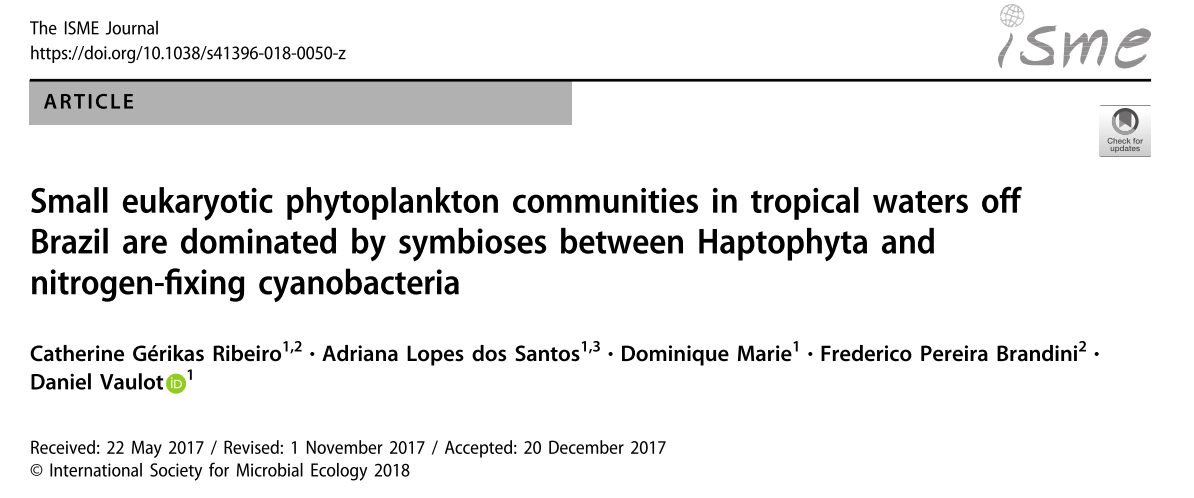

<span style="font-family: 'Times roman';">Las simbiosis entre algas eucariotas y cianobacterias fijadoras de nitrógeno han sido reconocidas en los últimos años como una fuente clave de nuevo nitrógeno en los océanos. Se investigo la composición de las pequeñas comunidades de eucariotas fotosintéticos asociados con cianobacterias fijadoras de nitrógeno en la bahía del Atlántico Sur de Brasil utilizando una combinación de citometría de flujo y secuenciación de alto rendimiento de dos genes: la región V4 de 18S rRNA y nifH. Se encontraron dos comunidades eucariotas distintas, una dominada por las mamielofíceas " Bathycoccus y Ostreococcus ", y otra dominada por una primnesiófita conocida por vivir en simbiosis con la cianobacteria fijadora de nitrógeno UCYN-A1. Entre las secuencias nifH, las de UCYN-A1 fueron las más abundantes, pero también se encontraron otros tres clados UCYN-A (A2, A3, A4). El análisis de redes confirmó la relación entre los clados A1 y A2 y sus hospedadores hipotéticos y señaló la posible asociación entre el nuevo clado A4 y Braarudosphaera bigelowii, que anteriormente se había considerado hospedador de A2.

In [1]:

# Paquetes necesarios (Descomentar para instalar)
# Generamos 3 objetos con la lista de paquetes provenientes de los repositorios CRAN, Bioconductor, y GitHub

# cran_packages <- c("factoextra", conflicted", "readxl", "knitr", "qtl", "bookdown", "magrittr", "plyr", "ggplot2", "grid", "gridExtra", "tidyverse", "devtools", "dplyr", "pheatmap", "xtable", "kableExtra", "remotes", "Rtsne", "vegan", "RColorBrewer", "PoiClaClu", "gtools")
# bioc_packages <- c("airway", "phyloseq", "dada2", "DECIPHER", "phangorn", "ggpubr","DESeq2", "genefilter", "philr", "GenomeInfoDb", "microbiome")
# git_source <- c("zdk123/SpiecEasi", "twbattaglia/btools", "gmteunisse/Fantaxtic", "MadsAlbertsen/ampvis2", "opisthokonta/tsnemicrobiota")
# git_packages <- c("btools", "fantaxtic", "ampvis2", "tsnemicrobiota")


# Instalar paquetes
# Las instrucciones a continuación, primero búscan aquellos paquetes que no han sido instalados
# y los guarda en el objeto (".inst""; el punto al inicio indica que es un objeto oculto)
# para luego instalar estos paquetes según el repositorio fuente

## Instalar paquetes CRAN

#.inst <- cran_packages %in% installed.packages()
#if(any(!.inst)) {
#  install.packages(cran_packages[!.inst])
#}

## Instalar paquetes Bioconductor
### cargar la última versión de Bioconductor e instalar sus paquetes básicos

#if (!requireNamespace("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install()

### instalar paquetes

#.inst <- bioc_packages %in% installed.packages()
#if(any(!.inst)) {
#  BiocManager::install(bioc_packages[!.inst])
#}
  
## Instalar paquetes GitHub
  
#.inst <- git_source %in% installed.packages()
#if(any(!.inst)) {
#  devtools::install_github(git_source[!.inst])
#}

# Cargar paquetes en la actual sesión de R
#sapply(c(cran_packages, bioc_packages, git_packages), require, character.only = TRUE)

Phyloseq es un paquete de Bioconductor (Open Source Software For Bioinformatics) para la manipulación y análisis de datos metagenómicos generados por metodologías de secuenciación de alto rendimiento. 
Phyloseq es una herramienta para importar, guardar, analizar y visualizar éste tipo de datos después de haber sido procesados inicialmente, e.g., ensamblaje de novo, ASVs u OTUs (clustered), incluyendo otros importantes  datos asociados (si están disponibles): tabla de observaciones asociadas a cada muestra (e.g., especie, localización geográfica, temperatura, etc.), conocida como sample data o metadata, árbol filogenético, e identificación taxonómica de cada OTU. La estructura del paquete phyloseq consiste 
en una serie de funciones de acceso y de proceso de objetos phyloseq. Estos objetos están compuestos de cuatro componentes que almacenan las cuentas de reads, la metadata, la taxonomía y el árbol filogenético. El paquete también provee una serie de herramientas para importar datos de otros programas. El siguiente diagrama muestra la estructura completa de phyloseq

![Texto alternativo](https://www.castrolab.org/teaching/data_analysis/images/phyloseq_structure.png)

In [2]:
# libreria
library("conflicted")
library("knitr")
library("qtl")
library("bookdown")
library("magrittr") 
library("plyr")
library("ggplot2") # esencial
library("grid")
library("gridExtra")
library("tidyverse")
library("devtools")
library("dplyr") # esencial
library("pheatmap")
library("xtable") 
library("kableExtra")
library("remotes")
library("Rtsne")
library("vegan")
library("RColorBrewer")
library("PoiClaClu")
library("gtools")
library("airway")
library("phyloseq") # esencial
library("dada2")
library("DECIPHER")
library("phangorn")
library("ggpubr")
library("DESeq2")
library("genefilter")
library("philr")
library("GenomeInfoDb")
library("microbiome")
library("btools")
library("tsnemicrobiota")
library("fantaxtic")
library("ampvis2")
library("tsnemicrobiota")
library("readxl") # esencial
library("SpiecEasi") # esencial
library("FactoMineR")
library("factoextra")
library("Matrix")
library("igraph")



-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.4     v tidyr     1.3.1
Cargando paquete requerido: usethis

Cargando paquete requerido: permute


Adjuntando el paquete: 'permute'


The following object is masked from 'package:devtools':

    check


Cargando paquete requerido: lattice

Cargando paquete requerido: SummarizedExperiment

Cargando paquete requerido: MatrixGenerics

Cargando paquete requerido: matrixStats


Adjuntando el paquete: 'matrixStats'


The following object is masked from 'package:dplyr':

    count


The following object is masked from 'package:plyr':

    count



Adjuntando el paquete: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    

Cambie tu directorio de trabajo al lugar donde se encuentran los archivos

Se necesitan tres tablas

OTU
Taxonomía
Muestras
Se leen de un único archivo Excel en el que cada hoja contiene una de las tablas

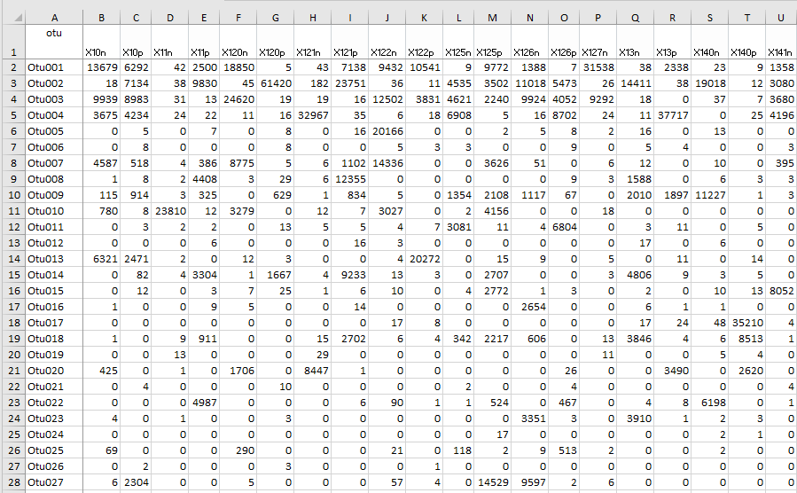

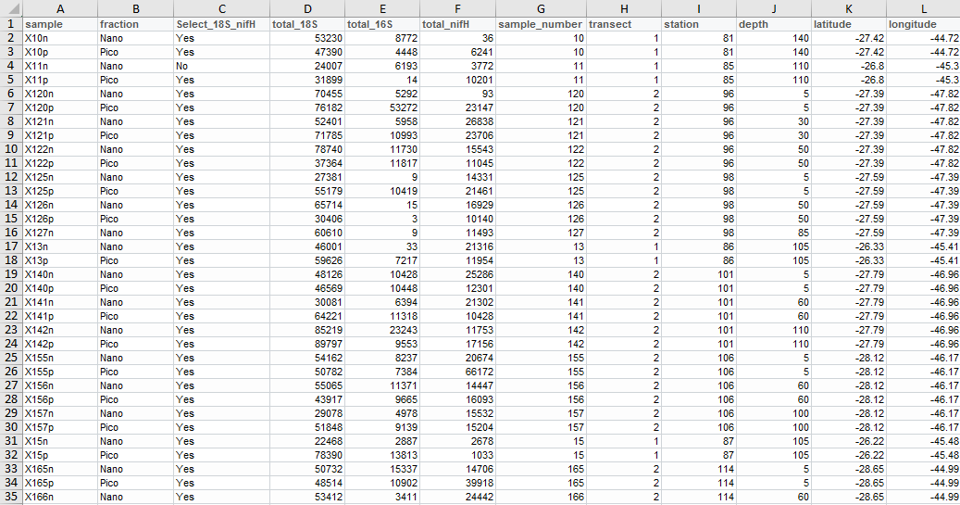

# CONCEPTOS

En los análisis filogenéticos, una unidad taxonómica operativa (UTO), también conocida por la sigla OTU. Operational Taxonomic Unit—es una unidad de clasificación seleccionada por el investigador que la utiliza para individualizar a objetos de su estudio, ya sea una especie u otro taxón de cualquier categoría,una morfoespecie, una población, y hasta un individuo, y de este modo poder ordenarlos en una clasificación y en la construcción de un árbol filogenético, sin juzgar si se corresponden a una entidad biológica particular


In [3]:
otu_mat<- read_excel("/Volumes/alex/biologia_de_sistemas_posgrado/material_redes_coocurrencia_estadsitica/datacarbom/CARBOM data.xlsx", sheet = "OTU matrix")
print(otu_mat)

tax_mat<- read_excel("/Volumes/alex/biologia_de_sistemas_posgrado/material_redes_coocurrencia_estadsitica/datacarbom/CARBOM data.xlsx", sheet = "Taxonomy table")
print(tax_mat)

samples_df <- read_excel("/Volumes/alex/biologia_de_sistemas_posgrado/material_redes_coocurrencia_estadsitica/datacarbom/CARBOM data.xlsx", sheet = "Samples")
print(samples_df)

# A tibble: 287 x 56
   otu    X10n  X10p  X11n  X11p X120n X120p X121n X121p X122n X122p X125n X125p
   <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Otu0~ 13679  6292    42  2500 18850     5    43  7138  9432 10541     9  9772
 2 Otu0~    18  7134    38  9830    45 61420   182 23751    36    11  4535  3502
 3 Otu0~  9939  8983    31    13 24620    19    19    16 12502  3831  4621  2240
 4 Otu0~  3675  4234    24    22    11    16 32967    35     6    18  6908     5
 5 Otu0~     0     5     0     7     0     8     0    16 20166     0     0     2
 6 Otu0~     0     8     0     0     0     8     0     0     5     3     3     0
 7 Otu0~  4587   518     4   386  8775     5     6  1102 14336     0     0  3626
 8 Otu0~     1     8     2  4408     3    29     6 12355     0     0     0     0
 9 Otu0~   115   914     3   325     0   629     1   834     5     0  1354  2108
10 Otu0~   780     8 23810    12  3279     0    12     7  3027     0     2  4156
# i 277

In [4]:
# Los objetos Phyloseq deben tener nombres de fila.

# definir los nombres de las filas de la columna otu

# tibble es una versión mejorada de la clase de objeto "data.frame".
# *Los nombres de las variables se preservar tal como se ingresaron
# *Los tibbles tienen un formato más limpio y fácil de leer que los data.frames
# *Las variables se imprimen en columnas separadas, lo que facilita la visualización de los datos

otu_mat <- otu_mat %>%
  tibble::column_to_rownames("otu")
print(otu_mat)

        X10n X10p  X11n X11p X120n X120p X121n X121p X122n X122p X125n X125p
Otu001 13679 6292    42 2500 18850     5    43  7138  9432 10541     9  9772
Otu002    18 7134    38 9830    45 61420   182 23751    36    11  4535  3502
Otu003  9939 8983    31   13 24620    19    19    16 12502  3831  4621  2240
Otu004  3675 4234    24   22    11    16 32967    35     6    18  6908     5
Otu005     0    5     0    7     0     8     0    16 20166     0     0     2
Otu006     0    8     0    0     0     8     0     0     5     3     3     0
Otu007  4587  518     4  386  8775     5     6  1102 14336     0     0  3626
Otu008     1    8     2 4408     3    29     6 12355     0     0     0     0
Otu009   115  914     3  325     0   629     1   834     5     0  1354  2108
Otu010   780    8 23810   12  3279     0    12     7  3027     0     2  4156
Otu011     0    3     2    2     0    13     5     5     4     7  3081    11
Otu012     0    0     0    6     0     0     0    16     3     0     0     0

In [5]:
# definir los nombres de las filas de la columna tax

tax_mat <- tax_mat %>%
  tibble::column_to_rownames("otu")
print(tax_mat)

          Domain     Supergroup         Division                Class
Otu001 Eukaryota Archaeplastida      Chlorophyta      Mamiellophyceae
Otu002 Eukaryota       Hacrobia       Haptophyta     Prymnesiophyceae
Otu003 Eukaryota Archaeplastida      Chlorophyta      Mamiellophyceae
Otu004 Eukaryota      Alveolata        Dinophyta          Dinophyceae
Otu005 Eukaryota  Stramenopiles       Ochrophyta      Bacillariophyta
Otu006 Eukaryota  Stramenopiles       Ochrophyta      Bacillariophyta
Otu007 Eukaryota  Stramenopiles       Ochrophyta        Pelagophyceae
Otu008 Eukaryota      Alveolata        Dinophyta          Dinophyceae
Otu009 Eukaryota       Hacrobia       Haptophyta     Prymnesiophyceae
Otu010 Eukaryota   Opisthokonta          Metazoa             Craniata
Otu011 Eukaryota  Stramenopiles       Ochrophyta        Chrysophyceae
Otu012 Eukaryota      Alveolata        Dinophyta          Dinophyceae
Otu013 Eukaryota      Alveolata        Dinophyta          Syndiniales
Otu014 Eukaryota  St

In [6]:
# definir los nombres de las filas de la columna samples

samples_df <- samples_df %>% 
  tibble::column_to_rownames("sample") 

In [7]:
# Transformar en matrices otu y tablas de tax (la tabla de muestra se puede dejar como marco de datos)

otu_mat <- as.matrix(otu_mat)
tax_mat <- as.matrix(tax_mat)


In [8]:
# Transformar a objetos phyloseq
conflicts_prefer(MicrobiotaProcess::tax_table)
conflicts_prefer(phyloseq::tax_table)

OTU = otu_table(otu_mat, taxa_are_rows = TRUE)
OTU
TAX = tax_table(tax_mat)
TAX
samples = sample_data(samples_df)
samples
# manejamos en un solo ojbeto los datos anteriormente transformados
carbom <- phyloseq(OTU, TAX, samples)
carbom

[conflicted] Will prefer MicrobiotaProcess::tax_table over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer phyloseq::tax_table over any other package.


X10n  X10p X11n  X11p X120n X120p X121n X121p X122n X122p ... X7n  
Otu001 13679 6292    42 2500 18850     5    43  7138  9432 10541 ... 12541
Otu002    18 7134    38 9830    45 61420   182 23751    36    11 ... 10010
Otu003  9939 8983    31   13 24620    19    19    16 12502  3831 ...    23
Otu004  3675 4234    24   22    11    16 32967    35     6    18 ...     8
Otu005     0    5     0    7     0     8     0    16 20166     0 ...    15
Otu006     0    8     0    0     0     8     0     0     5     3 ...     0
Otu007  4587  518     4  386  8775     5     6  1102 14336     0 ...     9
Otu008     1    8     2 4408     3    29     6 12355     0     0 ...   762
Otu009   115  914     3  325     0   629     1   834     5     0 ...  1520
Otu010   780    8 23810   12  3279     0    12     7  3027     0 ...     0
Otu011     0    3     2    2     0    13     5     5     4     7 ...     0
Otu012     0    0     0    6     0     0     0    16     3     0 ...     8
Otu013  6321 2471     2    0    12     3     0     0     4 20272 ...     2
Otu014     0   82     4 3304     1  1667     4  9233    13     3 ...  2637
Otu015     0   12     0    3     7    25     1     6    10     0 ...     3
Otu016     1    0     0    9     5     0     0    14     0     0 ...     1
Otu017     0    0     0    0     0     0     0     0    17     8 ...    10
Otu018     1    0     9  911     0     0    15  2702     6     4 ...  2104
Otu019     0    0    13    0     0     0    29     0     0     0 ...     0
Otu020   425    0     1    0  1706     0  8447     1     0     0 ...     1
Otu021     0    4     0    0     0    10     0     0     0     0 ...     0
Otu022     0    0     0 4987     0     0     0     6    90     1 ...     6
Otu023     4    0     1    0     0     3     0     0     0     0 ...  2053
Otu024     0    0     0    0     0     0     0     0     0     0 ...     0
Otu025    69    0     0    0   290     0     0     0    21     0 ...     0
Otu026     0    2     0    0     0     3     0     0     0     1 ...     0
Otu027     6 2304     0    0     5     0     0     0    57     4 ...     0
Otu028    19  467     0  363    79     0     1   816     1     0 ...    91
Otu029     0 1271     0    1     0     0  1794     1  1762   929 ...     1
Otu030     0    5     0    0     0     4     0     0   155     0 ...     0
...    ...   ...  ...   ...  ...   ...   ...   ...   ...   ...       ...  
Otu258 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu259 0     0    0     0    0     0     0      0    1     0     ... 0    
Otu260 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu261 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu262 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu263 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu264 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu265 0     0    0     3    0     0     0     10    0     0     ... 0    
Otu266 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu267 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu268 0     0    0     0    2     0     0      0    1     0     ... 0    
Otu269 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu270 0     0    0     0    0     0     0      1    0     0     ... 0    
Otu271 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu272 3     0    0     0    0     0     0      0    0     0     ... 0    
Otu273 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu274 0     0    0     0    0     0     0      0    0     0     ... 4    
Otu275 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu276 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu277 0     0    0     0    0     0     0      7    0     0     ... 0    
Otu278 0     0    0     0    0     0     0      0    0     0     ... 0    
Otu279 0     0    0     0    0  

Domain    Supergroup     Division        Class              
Otu001 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu002 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu003 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu004 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu005 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu006 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu007 Eukaryota Stramenopiles  Ochrophyta      Pelagophyceae      
Otu008 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu009 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu010 Eukaryota Opisthokonta   Metazoa         Craniata           
Otu011 Eukaryota Stramenopiles  Ochrophyta      Chrysophyceae      
Otu012 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu013 Eukaryota Alveolata      Dinophyta       Syndiniales        
Otu014 Eukaryota Stramenopiles  Ochrophyta      Chrysophyceae      
Otu015 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu016 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu017 Eukaryota Opisthokonta   Fungi           Basidiomycota      
Otu018 Eukaryota Stramenopiles  Ochrophyta      Dictyochophyceae   
Otu019 Eukaryota Opisthokonta   Fungi           Basidiomycota      
Otu020 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu021 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu022 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu023 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu024 Eukaryota Archaeplastida Streptophyta    Klebsormidiophyceae
Otu025 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu026 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu027 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu028 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu029 Eukaryota Opisthokonta   Fungi           Ascomycota         
Otu030 Eukaryota Hacrobia       Cryptophyta     Cryptophyceae      
...    ...       ...            ...             ...                
Otu258 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu259 Eukaryota Hacrobia       Cryptophyta     Cryptophyceae      
Otu260 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu261 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu262 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu263 Eukaryota Alveolata      Dinophyta       Dinophyceae        
Otu264 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu265 Eukaryota Stramenopiles  Stramenopiles_X MOCH               
Otu266 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu267 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu268 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu269 Eukaryota Alveolata      Ciliophora      Spirotrichea       
Otu270 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu271 Eukaryota Hacrobia       Centroheliozoa  Centroheliozoa_X   
Otu272 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu273 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu274 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu275 Eukaryota Stramenopiles  Stramenopiles_X MOCH               
Otu276 Eukaryota Stramenopiles  Ochrophyta      Dictyochophyceae   
Otu277 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu278 Eukaryota Opisthokonta   Metazoa         Arthropoda         
Otu279 Eukaryota Hacrobia       Haptophyta      Prymnesiophyceae   
Otu280 Eukaryota Stramenopiles  Ochrophyta      Bacillariophyta    
Otu281 Eukaryota Stramenopiles  Ochrophyta      Chrysophyceae      
Otu282 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu283 Eukaryota Archaeplastida Chlorophyta     Mamiellophyceae    
Otu284 Eukaryota Archaeplastida Streptophyta    Klebsormidiophy

fraction Select_18S_nifH total_18S total_16S total_nifH sample_number
X10n   Nano     Yes              53230     8772         36     10           
X10p   Pico     Yes              47390     4448       6241     10           
X11n   Nano     No               24007     6193       3772     11           
X11p   Pico     Yes              31899       14      10201     11           
X120n  Nano     Yes              70455     5292         93     120          
X120p  Pico     Yes              76182    53272      23147     120          
X121n  Nano     Yes              52401     5958      26838     121          
X121p  Pico     Yes              71785    10993      23706     121          
X122n  Nano     Yes              78740    11730      15543     122          
X122p  Pico     Yes              37364    11817      11045     122          
X125n  Nano     Yes              27381        9      14331     125          
X125p  Pico     Yes              55179    10419      21461     125          
X126n  Nano     Yes              65714       15      16929     126          
X126p  Pico     Yes              30406        3      10140     126          
X127n  Nano     Yes              60610        9      11493     127          
X13n   Nano     Yes              46001       33      21316     13           
X13p   Pico     Yes              59626     7217      11954     13           
X140n  Nano     Yes              48126    10428      25286     140          
X140p  Pico     Yes              46569    10448      12301     140          
X141n  Nano     Yes              30081     6394      21302     141          
X141p  Pico     Yes              64221    11318      10428     141          
X142n  Nano     Yes              85219    23243      11753     142          
X142p  Pico     Yes              89797     9553      17156     142          
X155n  Nano     Yes              54162     8237      20674     155          
X155p  Pico     Yes              50782     7384      66172     155          
X156n  Nano     Yes              55065    11371      14447     156          
X156p  Pico     Yes              43917     9665      16093     156          
X157n  Nano     Yes              29078     4978      15532     157          
X157p  Pico     Yes              51848     9139      15204     157          
X15n   Nano     Yes              22468     2887       2678     15           
X15p   Pico     Yes              78390    13813       1033     15           
X165n  Nano     Yes              50732    15337      14706     165          
X165p  Pico     Yes              48514    10902      39918     165          
X166n  Nano     Yes              53412     3411      24442     166          
X166p  Pico     Yes              62897    12788      28107     166          
X167n  Nano     Yes              31424    12874      20616     167          
X167p  Pico     Yes              49934    10885      13971     167          
X1n    Nano     Yes              95054     9139        163     1            
X1p    Pico     Yes              19466    15987     137117     1            
X2n    Nano     Yes              45111    10029        143     2            
X2p    Pico     Yes             107644    14585     113897     2            
X3n    Nano     Yes             131031    10037        116     3            
X3p    Pico     Yes             134873       26      92500     3            
X5n    Nano     Yes              24696     6340      77360     5            
X5p    Pico     Yes             112590    16141      25341     5            
X7n    Nano     Yes              40829     8443       7667     7            
X7p    Pico     Yes              22348     9254      26969     7            
X9n    Nano     Yes              19193     8156         34     9            
X9p    Pico     Yes              44610       29         53     9            
tri01n Nano     Yes              14162    11201      11792     Trichod.1    
tri01p Pico     Yes              36576    14786       7772     Trichod.1    
tri

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 287 taxa and 55 samples ]
sample_data() Sample Data:       [ 55 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 287 taxa by 7 taxonomic ranks ]

In [9]:
#Visualizar datos

sample_names(carbom)

rank_names(carbom)

sample_variables(carbom)

[1] "X10n"   "X10p"   "X11n"   "X11p"   "X120n"  "X120p"  "X121n"  "X121p" 
 [9] "X122n"  "X122p"  "X125n"  "X125p"  "X126n"  "X126p"  "X127n"  "X13n"  
[17] "X13p"   "X140n"  "X140p"  "X141n"  "X141p"  "X142n"  "X142p"  "X155n" 
[25] "X155p"  "X156n"  "X156p"  "X157n"  "X157p"  "X15n"   "X15p"   "X165n" 
[33] "X165p"  "X166n"  "X166p"  "X167n"  "X167p"  "X1n"    "X1p"    "X2n"   
[41] "X2p"    "X3n"    "X3p"    "X5n"    "X5p"    "X7n"    "X7p"    "X9n"   
[49] "X9p"    "tri01n" "tri01p" "tri02n" "tri02p" "tri03n" "tri03p"

[1] "Domain"     "Supergroup" "Division"   "Class"      "Order"     
[6] "Family"     "Genus"

[1] "fraction"          "Select_18S_nifH"   "total_18S"        
 [4] "total_16S"         "total_nifH"        "sample_number"    
 [7] "transect"          "station"           "depth"            
[10] "latitude"          "longitude"         "picoeuks"         
[13] "nanoeuks"          "bottom_depth"      "level"            
[16] "transect_distance" "date"              "time"             
[19] "phosphates"        "silicates"         "ammonia"          
[22] "nitrates"          "nitrites"          "temperature"      
[25] "fluorescence"      "salinity"          "sample_label"     
[28] "costa"

In [10]:
# vamos a conservar solo muestras para analizar (las que queremos analizar)

carbom <- subset_samples(carbom, Select_18S_nifH =="Yes")
carbom

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 287 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 287 taxa by 7 taxonomic ranks ]

In [11]:
# Mantenemos en este caso solo taxones fotosintéticos

carbom <- subset_taxa(carbom, Division %in% c("Chlorophyta", "Dinophyta", "Cryptophyta", 
                                              "Haptophyta", "Ochrophyta", "Cercozoa"))
carbom <- subset_taxa(carbom, !(Class %in% c("Syndiniales", "Sarcomonadea")))
carbom

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 205 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 205 taxa by 7 taxonomic ranks ]

In [12]:
# IMPORTANTE: Normalizar/escalar
# Normalizamos el número de lecturas en cada muestra utilizando la profundidad de secuenciación mediana.
# Normalizar en estadística se refiere a un proceso mediante el cual se ajustan los valores de una variable 
# para que estén en una escala común y comparable con otras variables. 
# En general, la normalización se utiliza para estandarizar los datos, de modo que las diferencias en la escala 
# o el rango de valores entre las diferentes variables no afecten el resultado de los análisis estadísticos.

# Algunos ejemplos comunes son la normalización z-score, la normalización min-max y la normalización por percentil

total = median(sample_sums(carbom))
total
standf = function(x, t=total) round(t * (x / sum(x)))
standf
carbom = transform_sample_counts(carbom, standf)
carbom

[1] 44903

function (x, t = total) 
round(t * (x/sum(x)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 205 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 205 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 205 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 205 taxa by 7 taxonomic ranks ]

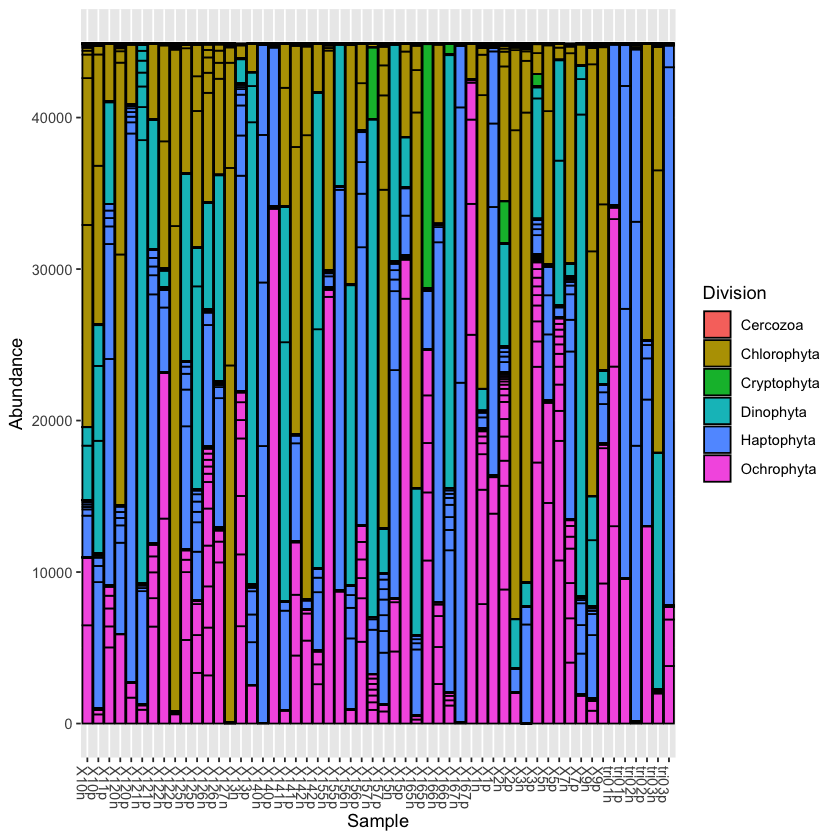

In [13]:
# El número de lecturas utilizadas para la normalización es 44903 .

plot_bar(carbom, fill = "Division")

carbom

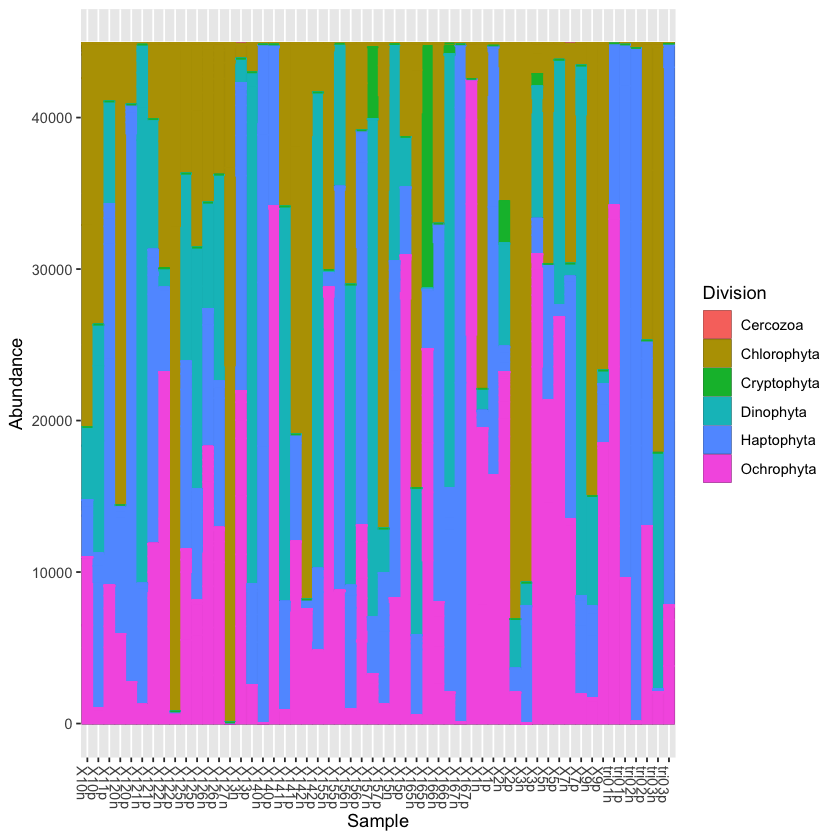

In [14]:
# lo mismo pero más bonito

plot_bar(carbom, fill = "Division") + 
  geom_bar(aes(color=Division, fill=Division), stat="identity", position="stack")


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 205 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 205 taxa by 7 taxonomic ranks ]

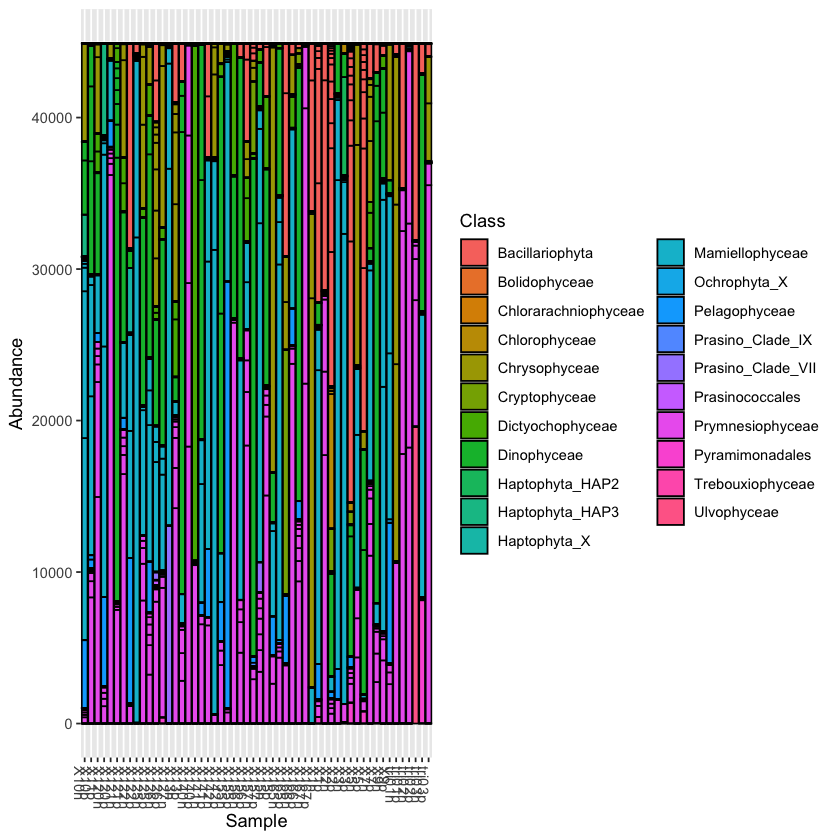

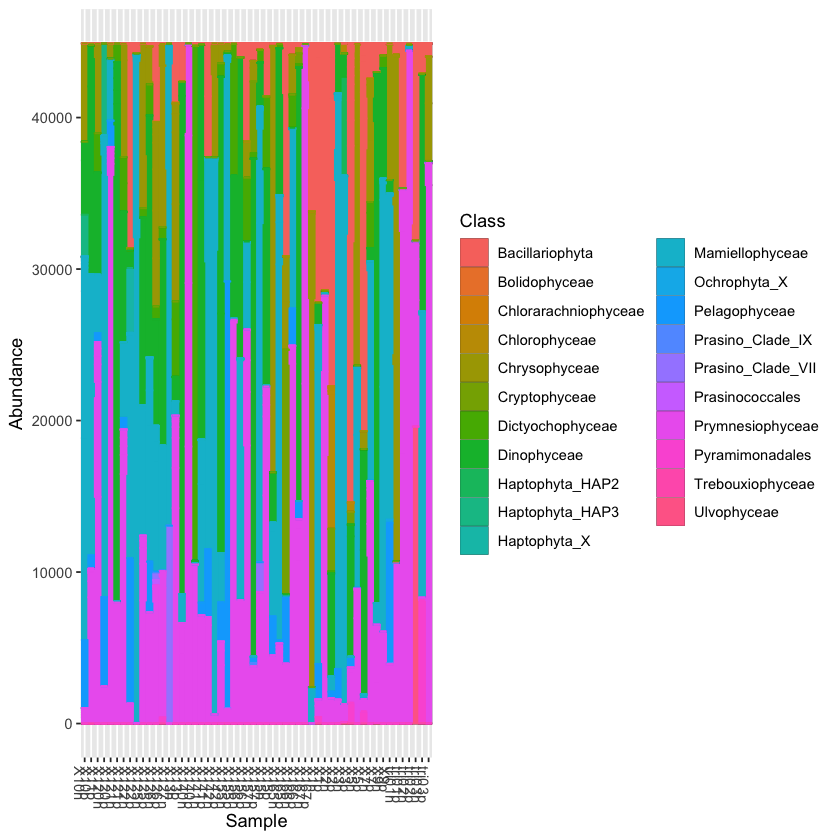

In [15]:
# ahora para la Clase
plot_bar(carbom, fill = "Class")
carbom

plot_bar(carbom, fill = "Class") + 
  geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack")


# PREVALENCIA/ABUNDANCIA

Lo primero que podemos mirar es la prevalencia de las features taxonómicas.

Primero que podemos hacer es crear un data frame con los valores de prevalencia, luego les agregamos la taxonomía y graficamos.

Computamos prevalencia para cada feature y la guardamos en un data frame

la prevalencia se refiere a la proporción de individuos en una población que tienen una enfermedad o condición específica en un momento dado. Por lo tanto, una prevalencia del 5% indica que el 5% de la población estudiada tiene la enfermedad o condición en cuestión en el momento en que se llevó a cabo el estudio.


In [16]:
prevcarbom = apply(X = otu_table(carbom),
               MARGIN = ifelse(taxa_are_rows(carbom), yes = 1, no = 2),
               FUN = function(x){sum(x > 0)})
# Le agregamos la taxonomía
prevcarbom = data.frame(Prevalence = prevcarbom,
                    TotalAbundance = taxa_sums(carbom),
                    tax_table(carbom))

plyr::ddply(prevcarbom, "Division", function(df1){cbind(mean(df1$Prevalence),sum(df1$Prevalence))}) -> dfprevcarbom

# podemos ver en la consola la prevalencia
prevcarbom

#        Prevalence TotalAbundance    Domain     Supergroup    Division             Class
# Otu001         50         259644 Eukaryota Archaeplastida Chlorophyta   Mamiellophyceae
# Otu002         54         359480 Eukaryota       Hacrobia  Haptophyta  Prymnesiophyceae
# Otu003         52         279102 Eukaryota Archaeplastida Chlorophyta   Mamiellophyceae

Prevalence TotalAbundance Domain    Supergroup     Division   
Otu001 50         259644         Eukaryota Archaeplastida Chlorophyta
Otu002 54         359480         Eukaryota Hacrobia       Haptophyta 
Otu003 52         279102         Eukaryota Archaeplastida Chlorophyta
Otu004 50         151580         Eukaryota Alveolata      Dinophyta  
Otu005 28          45560         Eukaryota Stramenopiles  Ochrophyta 
Otu006 22          47960         Eukaryota Stramenopiles  Ochrophyta 
Otu007 42          84868         Eukaryota Stramenopiles  Ochrophyta 
Otu008 34          59937         Eukaryota Alveolata      Dinophyta  
Otu009 43          92316         Eukaryota Hacrobia       Haptophyta 
Otu011 29          53322         Eukaryota Stramenopiles  Ochrophyta 
Otu012 18          48556         Eukaryota Alveolata      Dinophyta  
Otu014 41          54301         Eukaryota Stramenopiles  Ochrophyta 
Otu015 32          52928         Eukaryota Alveolata      Dinophyta  
Otu018 40          56796         Eukaryota Stramenopiles  Ochrophyta 
Otu020 20          39708         Eukaryota Hacrobia       Haptophyta 
Otu021 19          14861         Eukaryota Alveolata      Dinophyta  
Otu022 33          37498         Eukaryota Hacrobia       Haptophyta 
Otu023 32          32811         Eukaryota Stramenopiles  Ochrophyta 
Otu025 22          35716         Eukaryota Archaeplastida Chlorophyta
Otu026 19          32017         Eukaryota Stramenopiles  Ochrophyta 
Otu027 21          23263         Eukaryota Alveolata      Dinophyta  
Otu028 38          33453         Eukaryota Hacrobia       Haptophyta 
Otu030 22          24661         Eukaryota Hacrobia       Cryptophyta
Otu032 24          15784         Eukaryota Archaeplastida Chlorophyta
Otu033 10          19643         Eukaryota Archaeplastida Chlorophyta
Otu034 13          32984         Eukaryota Alveolata      Dinophyta  
Otu035 29          36098         Eukaryota Stramenopiles  Ochrophyta 
Otu036  8           6566         Eukaryota Hacrobia       Haptophyta 
Otu037 11           9060         Eukaryota Stramenopiles  Ochrophyta 
Otu038 23          23969         Eukaryota Stramenopiles  Ochrophyta 
...    ...        ...            ...       ...            ...        
Otu241  3         22             Eukaryota Stramenopiles  Ochrophyta 
Otu242 12         26             Eukaryota Archaeplastida Chlorophyta
Otu245  4         12             Eukaryota Archaeplastida Chlorophyta
Otu247  1         15             Eukaryota Stramenopiles  Ochrophyta 
Otu248  1          9             Eukaryota Stramenopiles  Ochrophyta 
Otu249  2         24             Eukaryota Archaeplastida Chlorophyta
Otu250  2         21             Eukaryota Stramenopiles  Ochrophyta 
Otu251 10         17             Eukaryota Archaeplastida Chlorophyta
Otu252  2         20             Eukaryota Archaeplastida Chlorophyta
Otu253  1         14             Eukaryota Archaeplastida Chlorophyta
Otu254 12         19             Eukaryota Archaeplastida Chlorophyta
Otu255  1         10             Eukaryota Stramenopiles  Ochrophyta 
Otu257  5         28             Eukaryota Stramenopiles  Ochrophyta 
Otu259  3         21             Eukaryota Hacrobia       Cryptophyta
Otu260  2          9             Eukaryota Stramenopiles  Ochrophyta 
Otu263  1          9             Eukaryota Alveolata      Dinophyta  
Otu268  8         14             Eukaryota Archaeplastida Chlorophyta
Otu272  3         36             Eukaryota Archaeplastida Chlorophyta
Otu273  2         40             Eukaryota Archaeplastida Chlorophyta
Otu274  2         13             Eukaryota Hacrobia       Haptophyta 
Otu276  1         10             Eukaryota Stramenopiles  Ochrophyta 
Otu277  2         16             Eukaryota Archaeplastida Chlorophyta
Otu279  2         13             Eukaryota Hacrobia       Haptophyta 
Otu280  2          4             Eukaryota Stramenopiles  Ochrophyta 
Otu281  1          7             Eukaryota Stramenopiles  Ochrophyta 
Otu282  2        

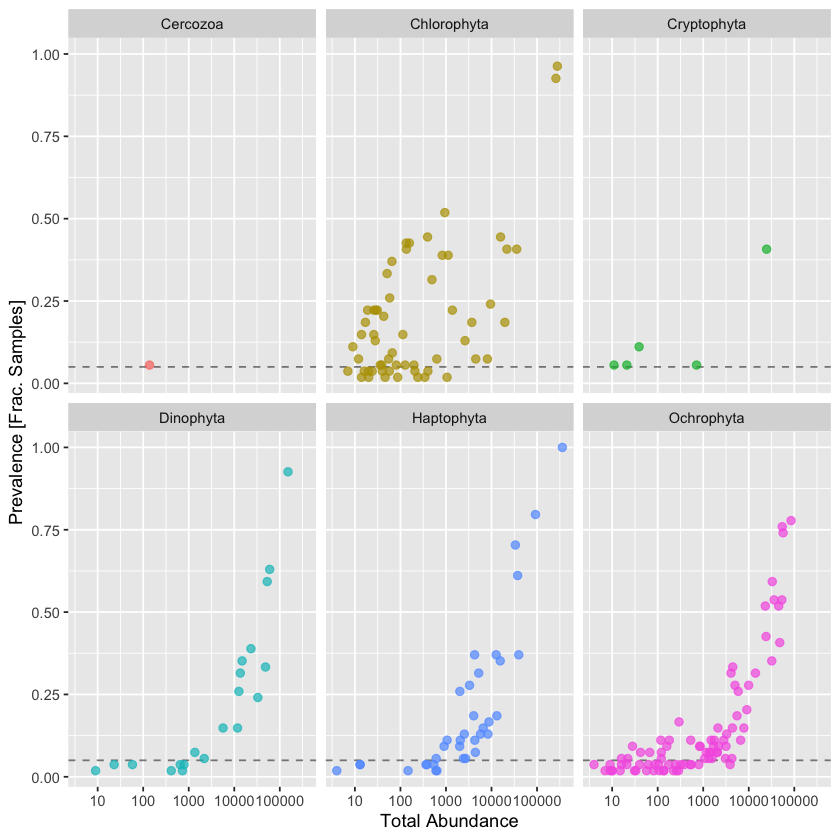

In [17]:
# Otra forma de verlo (División) es de forma gráfica, asi:

prevcarbom1 = subset(prevcarbom, Division %in% get_taxa_unique(carbom, "Division"))
ggplot(prevcarbom1, aes(TotalAbundance, Prevalence / nsamples(carbom),color=Division)) +
  # Agregamos una línea para nuestro umbral
  geom_hline(yintercept = 0.05, alpha = 0.5, linetype = 2) +  geom_point(size = 2, alpha = 0.7) +
  scale_x_log10() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Division) + theme(legend.position="none")

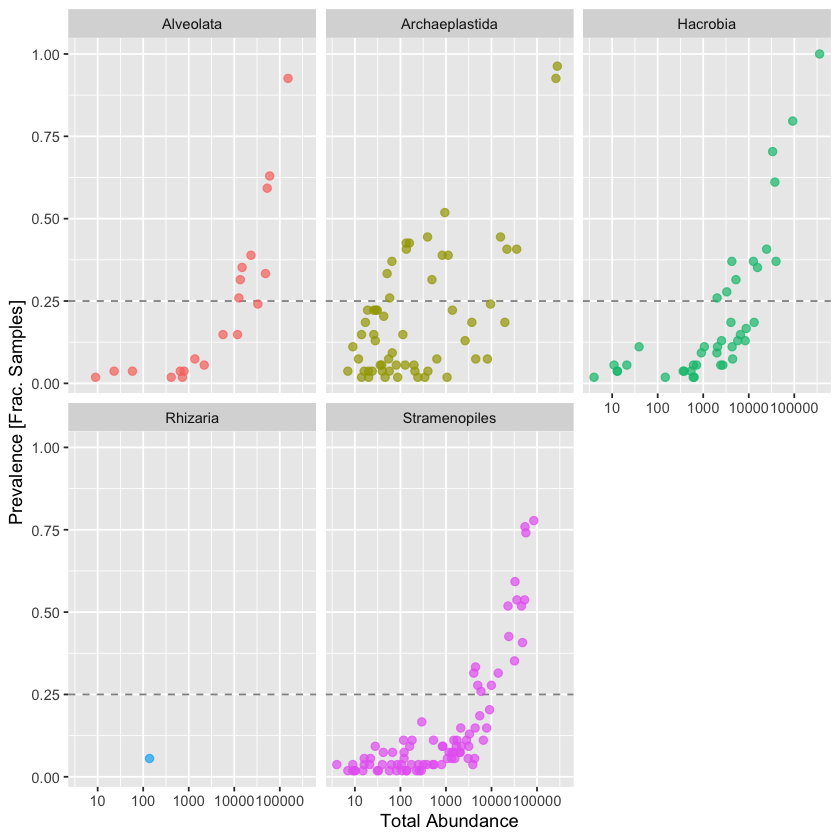

In [18]:
# en este caso la variamos con el Supergroup
prevcarbom2 = subset(prevcarbom, Supergroup %in% get_taxa_unique(carbom, "Supergroup"))
ggplot(prevcarbom2, aes(TotalAbundance, Prevalence / nsamples(carbom),color=Supergroup)) +
  # Agregamos una línea para nuestro umbral
  geom_hline(yintercept = 0.25, alpha = 0.5, linetype = 2) +  geom_point(size = 2, alpha = 0.7) +
  scale_x_log10() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Supergroup) + theme(legend.position="none")

In [19]:
# Definimos el umbral de prevalencia a un 5%
(prevalenceThreshold = 0.05 * nsamples(carbom))

# [1] 2.7

keepTaxa = rownames(prevcarbom2)[(prevcarbom2$Prevalence >= prevalenceThreshold)]
(carbom2 = prune_taxa(keepTaxa, carbom))

[1] 2.7

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 143 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 143 taxa by 7 taxonomic ranks ]

Y asi podriamos hacerlo con los datos que quisieramos. Si os fijais en el excel existe una columna llamada "fraction" con dos valores: Pico y Nano en el estudio, hace referencia a la composición de pico y nano-fitoplancton en el area  Atlántico Sur frente a Brasil este analisis de clasificación se llevo a cabo  por citometría de flujo

Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in asMethod(object):
"NAs introducidos por coerci'on"
Warning message in a

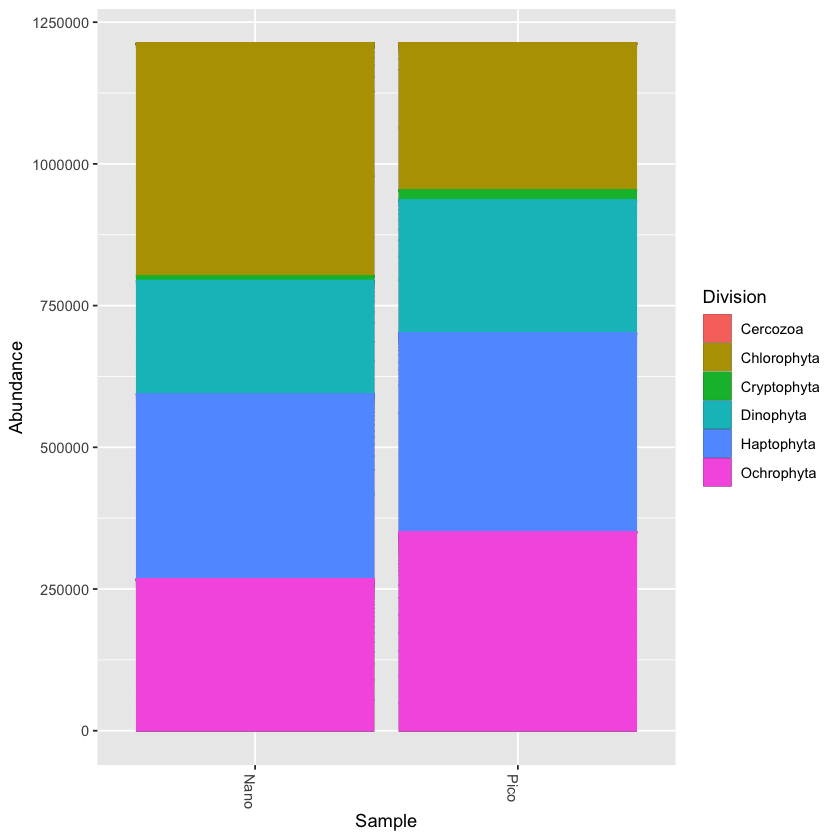

In [20]:
# nosotros podemos realizar un analisis de composición de pico vs nano-fitoplancton, entonces reagrupamos muestras Pico vs Nano

carbom_fraction <- merge_samples(carbom, "fraction")
plot_bar(carbom_fraction, fill = "Division") + 
  geom_bar(aes(color=Division, fill=Division), stat="identity", position="stack")

# y vemos la abundancia de nano vs pico

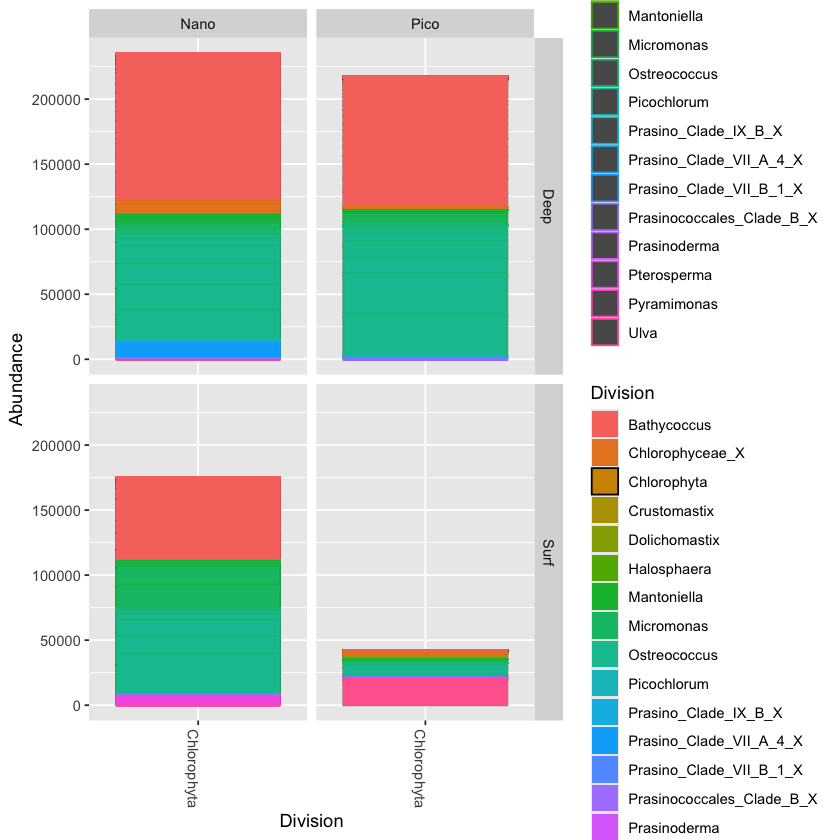

In [21]:
# podemos tambien hacer paneles separados Pico vs Nano y Surface vs muestras Deep
carbom_chloro <- subset_taxa(carbom, Division %in% c("Chlorophyta"))
plot_bar(carbom_chloro, x="Division", fill = "Division", facet_grid = level~fraction) +
  geom_bar(aes(color=Genus, fill=Genus), stat="identity", position="stack")

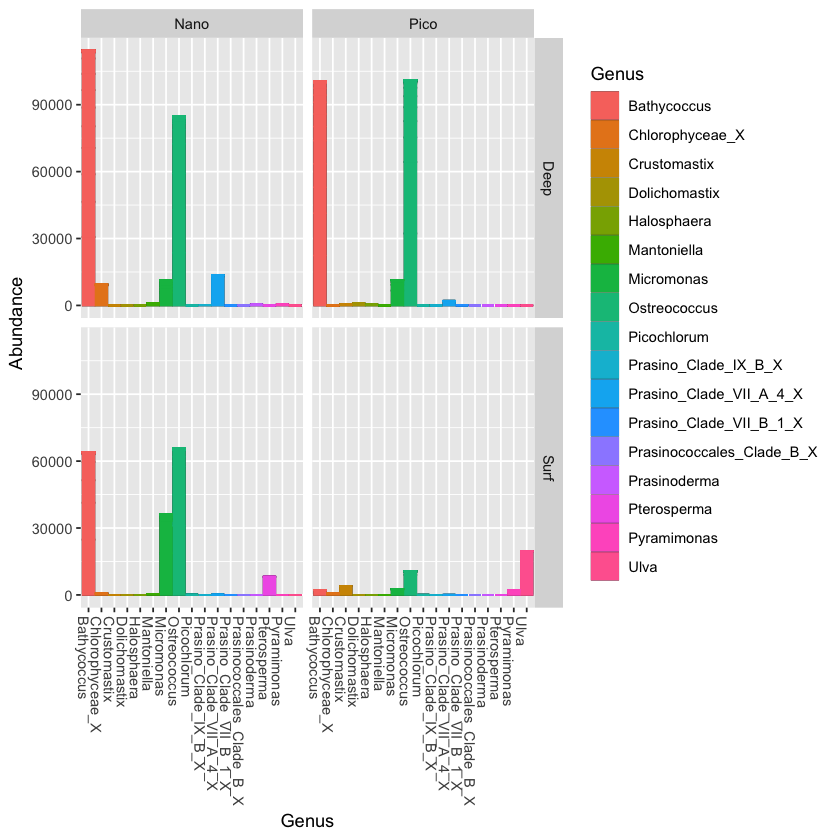

In [22]:
# Division
carbom_chloro <- subset_taxa(carbom, Division %in% c("Chlorophyta"))
plot_bar(carbom_chloro, x="Genus", fill = "Genus", facet_grid = level~fraction) +
  geom_bar(aes(color=Genus, fill=Genus), stat="identity", position="stack")


In [23]:
set.seed(4235421)
# proj <- get_ordination(pseq, "MDS", "bray")
ord <- ordinate(carbom, "MDS", "bray")

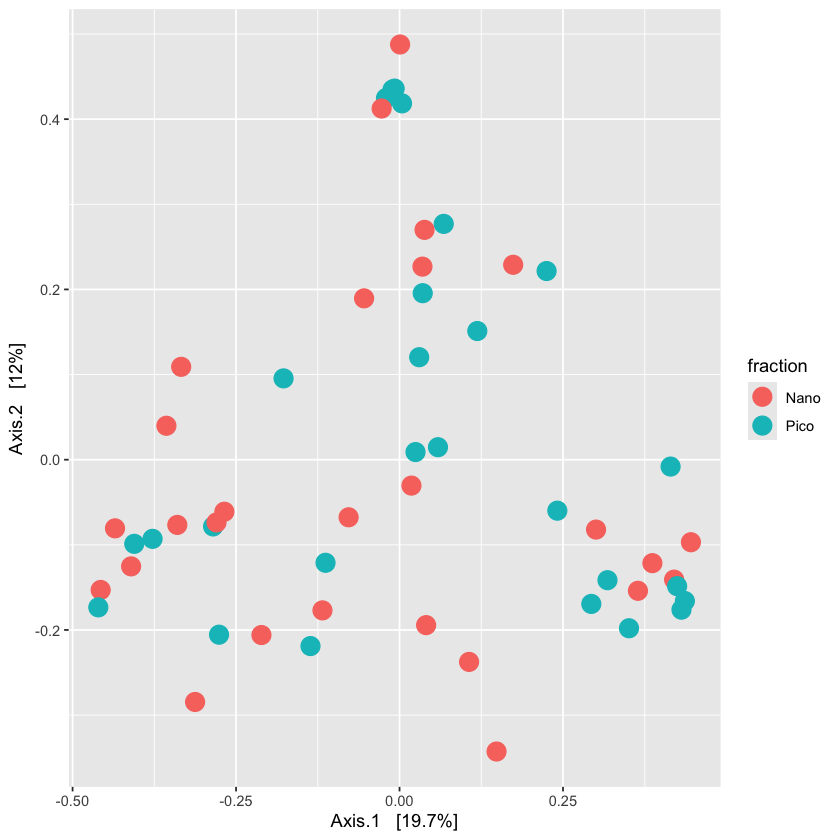

In [24]:
plot_ordination(carbom, ord, color = "fraction") +
                geom_point(size = 5)

#  MAPAS DE CALOR/HEATMAP

NMDS son las siglas en inglés de Nonmetric Multidimensional Scaling, lo que en español se traduce como "Escalamiento Multidimensional No Métrico". 
Es una técnica estadística utilizada para visualizar y analizar datos de similitud o disimilitud entre objetos o individuos en el contexto de la metagenómica,  se enfoca en el estudio del material genético presente en comunidades microbianas complejas. 

Warning message in scale_fill_gradient(low = low, high = high, trans = trans, na.value = na.value):
"log-4 transformation introduced infinite values."


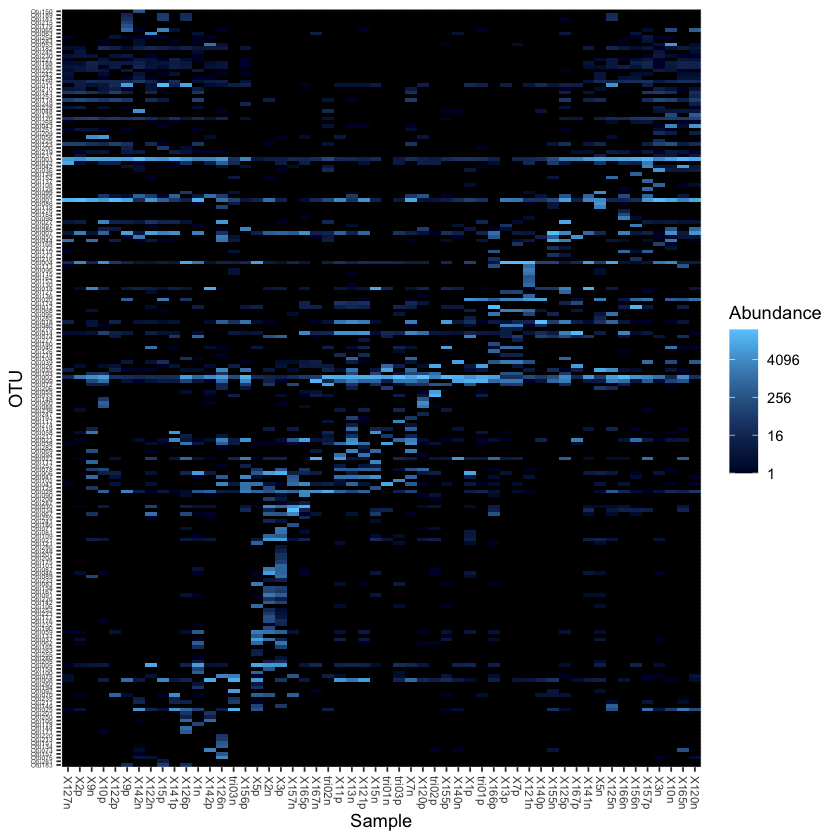

In [25]:
# en este caso el análisis NMDS de comunidades se baso en las principales OTU de ARNr 18S se realizó utilizando la distancia de Bray-Curtis 

plot_heatmap(carbom, method = "NMDS", distance = "bray")


Está muy muy desordenado. Es mejor considerar solo las OTU más abundantes para los mapas de calor. 
Por ejemplo, solo se pueden tomar OTU que representen al menos el 20 % de las lecturas en al menos una muestra. 
Recordemos que normalizamos todas las muestras a la mediana del número de lecturas (total). 
Nos quedamos entonces solo con 33 OTUS lo que facilita mucho la lectura.

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 33 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 28 sample variables ]
tax_table()   Taxonomy Table:    [ 33 taxa by 7 taxonomic ranks ]

X10n  X10p  X11p  X120n X120p
Otu001 13339  7346  3804 12662     3
Otu002    18  8329 14958    30 36206
Otu003  9692 10488    20 16537    11
Otu004  3584  4943    33     7     9
Otu005     0     6    11     0     5
Otu006     0     9     0     0     5
Otu007  4473   605   587  5894     3
Otu008     1     9  6707     2    17

Warning message in scale_fill_gradient(low = low, high = high, trans = trans, na.value = na.value):
"log-4 transformation introduced infinite values."


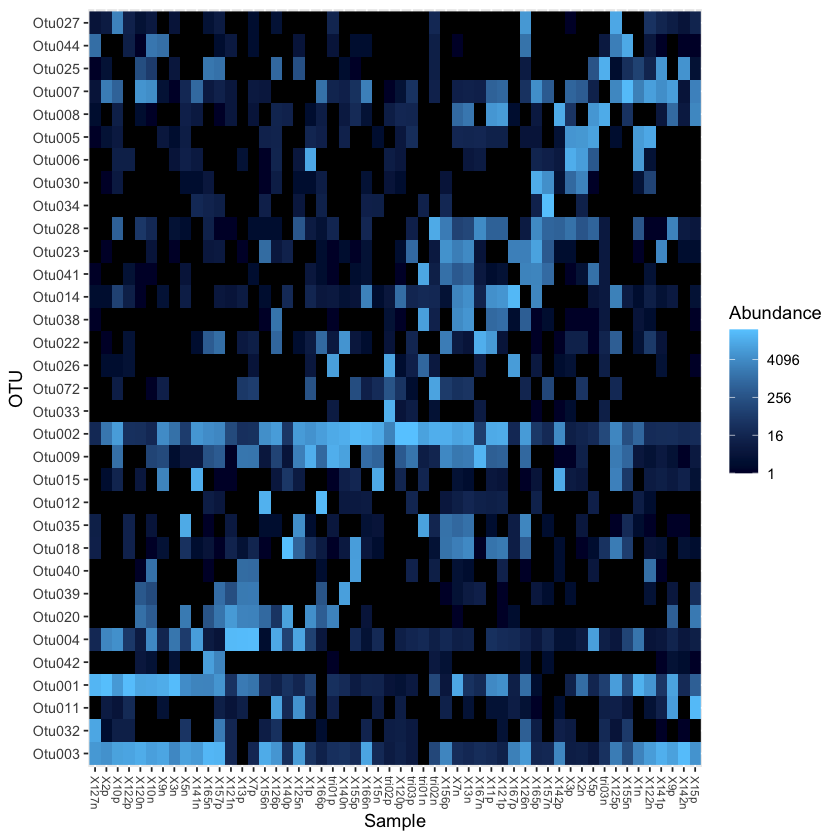

In [27]:
carbom_abund <- filter_taxa(carbom, function(x) sum(x > total*0.20) > 0, TRUE)
carbom_abund

otu_table(carbom_abund)[1:8, 1:5]

plot_heatmap(carbom_abund, method = "NMDS", distance = "bray")


Warning message in scale_fill_gradient(low = low, high = high, trans = trans, na.value = na.value):
"log-4 transformation introduced infinite values."


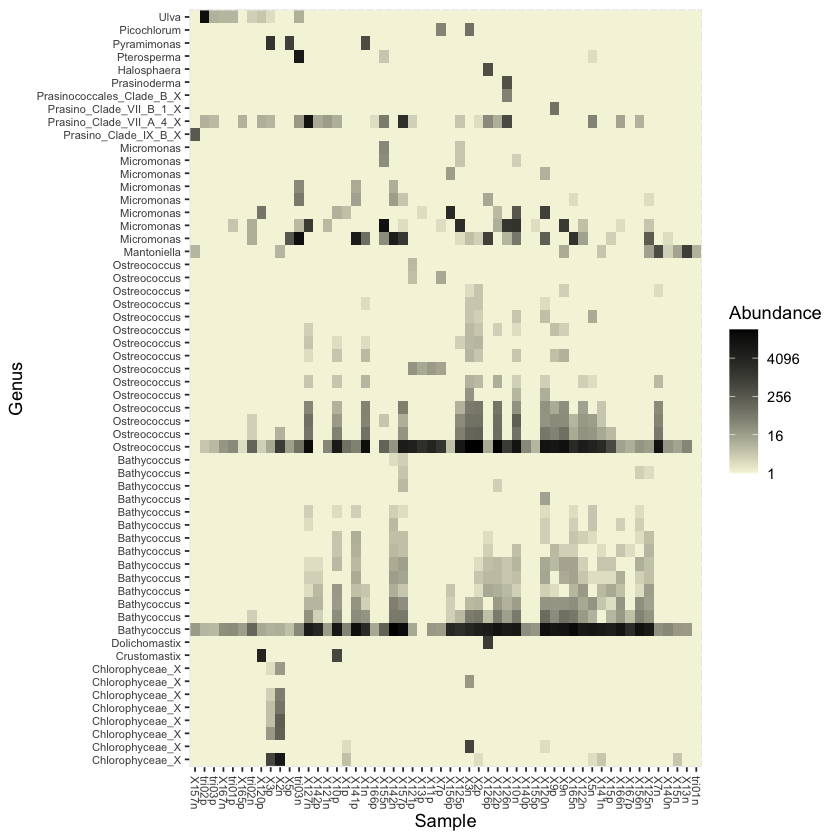

In [28]:
# otro ejemplo seria con esta metodologia: CCA/euclidean

plot_heatmap(carbom_chloro, method = "CCA", distance = "euclidean", 
             taxa.label = "Genus", taxa.order = "Genus", 
             low="beige", high="black", na.value="beige")

    UniFrac1     UniFrac2        DPCoA          JSD     vegdist1     vegdist2 
   "unifrac"   "wunifrac"      "dpcoa"        "jsd"  "manhattan"  "euclidean" 
    vegdist3     vegdist4     vegdist5     vegdist6     vegdist7     vegdist8 
  "canberra"       "bray" "kulczynski"    "jaccard"      "gower"   "altGower" 
    vegdist9    vegdist10    vegdist11    vegdist12    vegdist13    vegdist14 
  "morisita"       "horn"  "mountford"       "raup"   "binomial"       "chao" 
   vegdist15   betadiver1   betadiver2   betadiver3   betadiver4   betadiver5 
       "cao"          "w"         "-1"          "c"         "wb"          "r" 
  betadiver6   betadiver7   betadiver8   betadiver9  betadiver10  betadiver11 
         "I"          "e"          "t"         "me"          "j"        "sor" 
 betadiver12  betadiver13  betadiver14  betadiver15  betadiver16  betadiver17 
         "m"         "-2"         "co"         "cc"          "g"         "-3" 
 betadiver18  betadiver19  betadiver20  betadiver21 

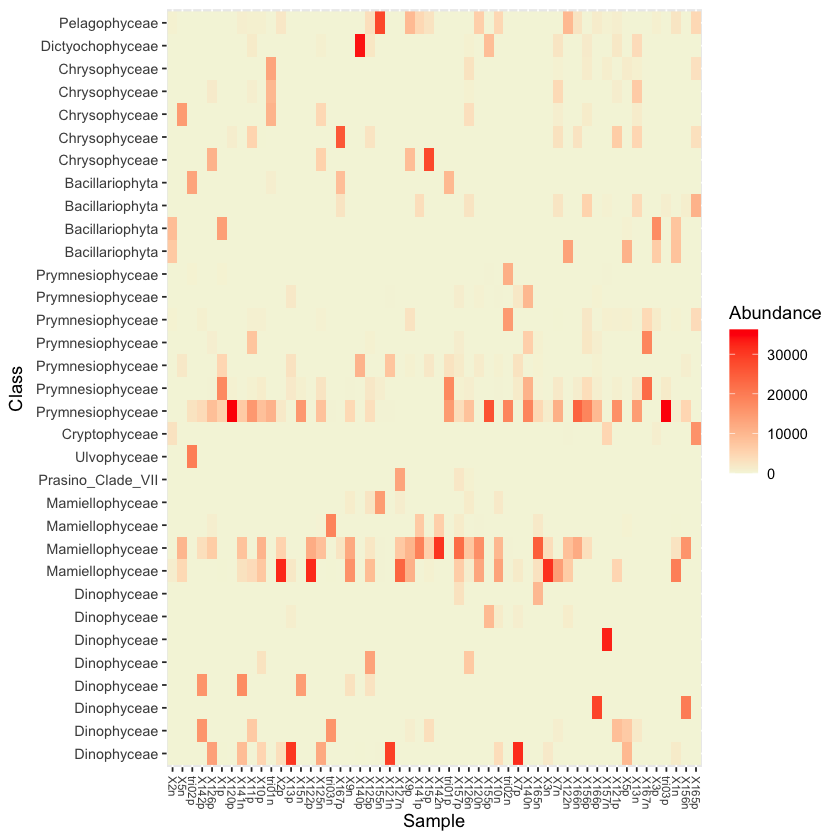

In [29]:
# Tambien es posible utilizar diferentes distancias y diferentes métodos multivariantes. 
# Por ejemplo, distancia Jaccard y MDS y etiquetar OTU con Clase, ordenar por Clase.
# También podemos cambiar la Paleta (la paleta por defecto es un poco fea…).

plot_heatmap(carbom_abund, method = "MDS", distance = "(A+B-2*J)/(A+B-J)", 
             taxa.label = "Class", taxa.order = "Class", 
             trans=NULL, low="beige", high="red", na.value="#04162c")

# tenemos opciones de utilizar muchas distancias integradas diferentes

dist_methods <- unlist(distanceMethodList)
print(dist_methods)

También podemos construir nuestras propias distancias.

Para los vectores x e y, los términos "cuadráticos" 
son J = sum(x*y), A = sum(x^2), 
B = sum(y^2) y los términos "mínimos" son J = sum(pmin(x ,y)), 
A = sum(x) y B = sum(y), y los términos "binarios" son cualquiera de estos después de transformar 
los datos en forma binaria (número compartido de especies y número de especies para cada fila). 

Algunos ejemplos:

A+B-2*J “cuadrático” euclidiano al cuadrado

A+B-2*J “mínimo” Manhattan

(A+B-2*J)/(A+B) “mínimo” Bray-Curtis

(A+B-2*J)/(A+B) “binario” Sørensen

A+B-2*J)/(A+BJ) Jaccard “binario”

Otra estrategia es hacer un mapa de calor para un grupo de taxonomía específico.


Warning message in scale_fill_gradient(low = low, high = high, trans = trans, na.value = na.value):
"log-4 transformation introduced infinite values."


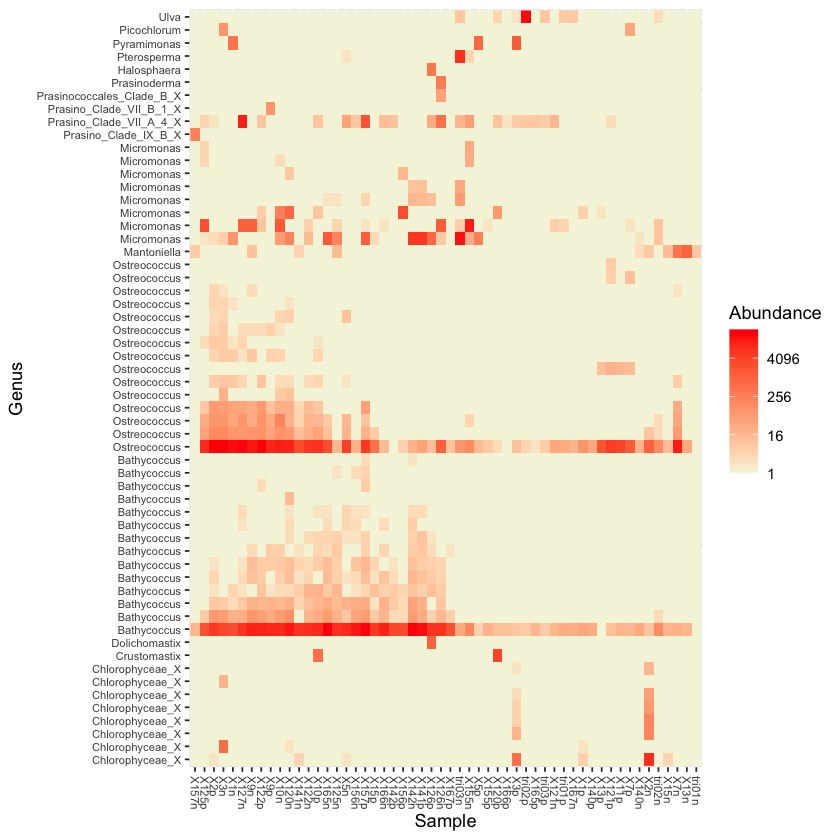

In [30]:
# Por ejemplo, podemos apuntar a Chlorophyta y luego etiquetar las OTU usando el Género.

plot_heatmap(carbom_chloro, method = "NMDS", distance = "bray", 
             taxa.label = "Genus", taxa.order = "Genus", 
             low="beige", high="red", na.value="beige")

# Medidas de riqueza/rarefacción, uniformidad, dominancia, diversidad filogenética (diversidad alfa)

La rarefacción es un método utilizado en ecología para estandarizar la comparación de la diversidad de muestras con diferentes tamaños.
Consiste en seleccionar una submuestra aleatoria del mismo tamaño (basado en la muestra más pequeña) de cada muestra y comparar los resultados.
De esta manera, se estandariza la comparación y se evita que la diversidad de una muestra se vea afectada por el tamaño de la muestra.

# DIVERSIDAD ALFA

Las medidas de diversidad alfa se utilizan para identificar la riqueza y uniformidad dentro de los taxones individuales. Las métricas/índices comúnmente utilizados son Shannon, Inverse Simpson, Simpson, Gini, Observed y Chao1. Estos índices no tienen en cuenta la filogenia de los taxones identificados en la secuenciación. La diversidad filogenética (PD de Faith) utiliza la distancia filogenética para calcular la diversidad de una muestra determinada.

Observad (simplemente el número de taxa o riqueza), 

Chao1 (la riqueza ajustada por probabilidad de no observar especies), 

ACE (riqueza que toma en cuenta la abundancia relativa), 

Shannon (abundancia relativa de taxa), 

Simpson (1 - la probabilidad de que observemos aleatoriamente dos bacterias en una comunidad y que pertenezcan a diferentes especies ), 

Inverse Simpson ( 1 / Simpson), 

Fisher (riqueza tomando en cuenta abundancia).

Es importante señalar que los índices de diversidad alfa son sensibles al ruido inherente a la aplicación de la reacción en cadena de la polimerasa y los errores de secuenciación.

Uno tiene que considerar la profundidad de secuenciación (cuántos taxones han sido muestreados) para cada muestra. Si hay una gran diferencia, entonces es importante normalizar las muestras a la misma profundidad de muestreo. Primero, observamos la profundidad de muestreo (cantidad de lecturas por muestra).

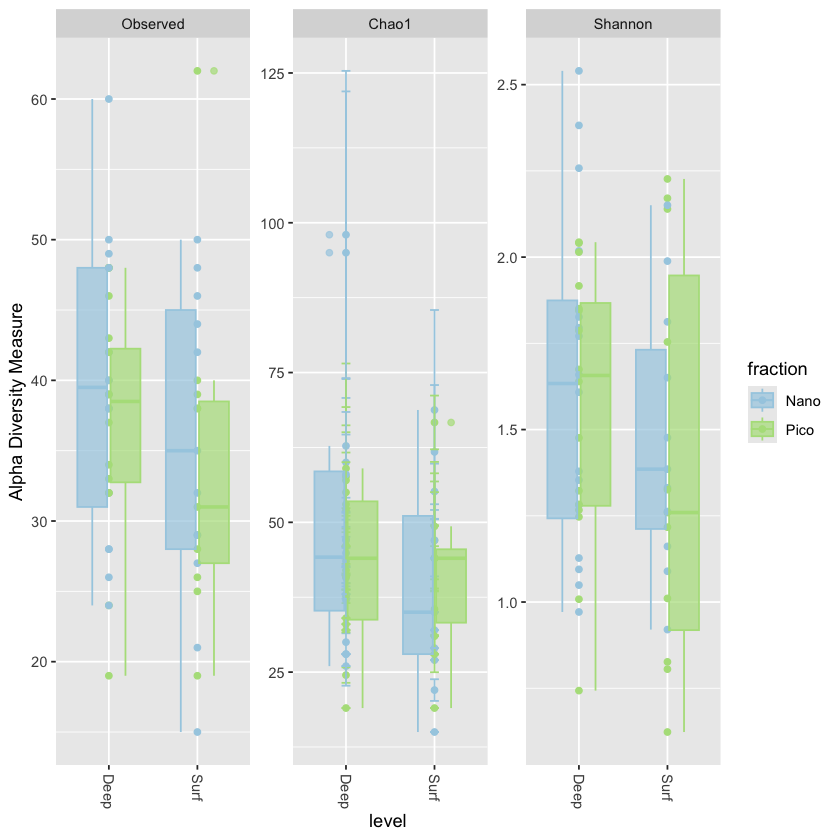

In [31]:
# En phyloseq simplemente llamamos la función plot_richness y podemos visualizar las medidas de diversidad

# CON LOS ESTIMADORES OBSERVED, SHANON Y CHAO1
# aca lo hacemos con fraction (Pico-Nano) vs level (Sur-Deep)
plot_richness(carbom, color = "fraction", x= "level", measures = c("Observed", "Chao1", "Shannon")) + geom_boxplot(aes(fill = fraction), alpha=.7) + scale_color_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f")) + scale_fill_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f"))


Las muestras Pico suelen ser menos diversas que las Nano cuando se observa la riqueza (Observed y Chao1), pero esta tendencia se invierte cuando se considera el índice de Shannon en el nivel.

Los puntos individuales fuera de las cajas representan outliers o valores atípicos, que son muestras con valores de diversidad mucho más altos o bajos que el resto en su grupo.

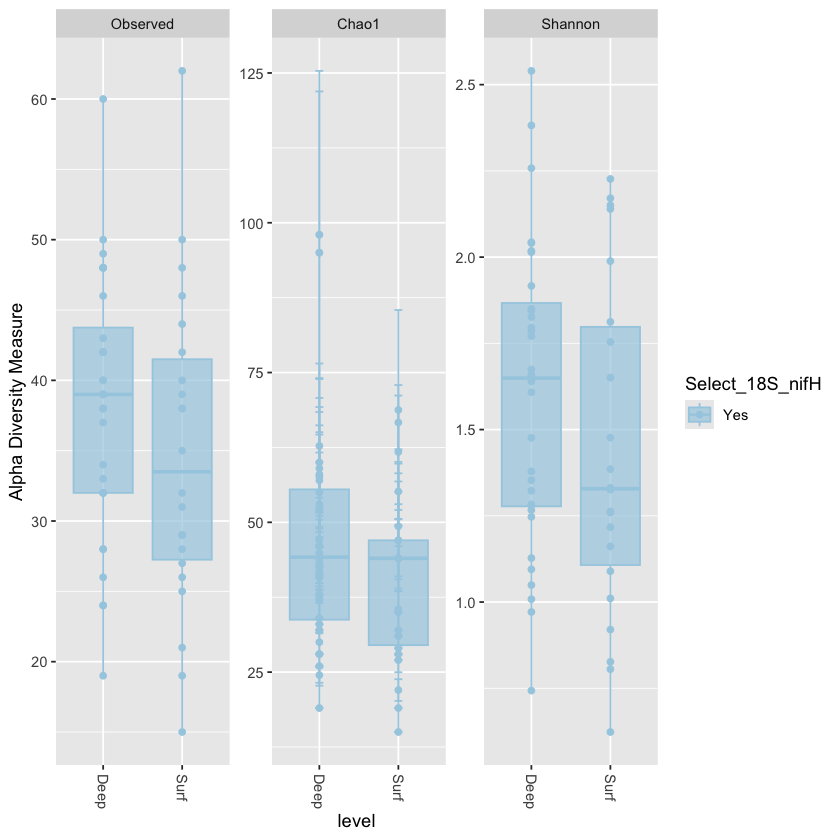

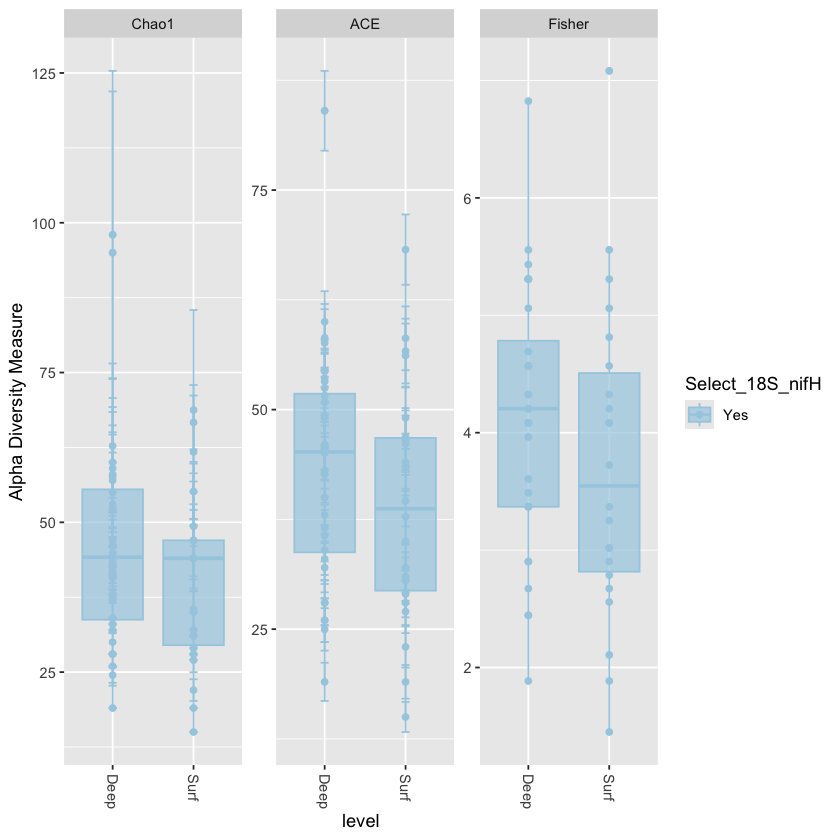

In [32]:
# otro ejemplo
plot_richness(carbom, color = "Select_18S_nifH", x= "level", measures = c("Observed", "Chao1", "Shannon")) + geom_boxplot(aes(fill = Select_18S_nifH), alpha=.7) + scale_color_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f")) + scale_fill_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f"))
plot_richness(carbom, color = "Select_18S_nifH", x= "level", measures = c("ACE", "Chao1", "Fisher")) + geom_boxplot(aes(fill = Select_18S_nifH), alpha=.7) + scale_color_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f")) + scale_fill_manual(values = c("#a6cee3", "#b2df8a", "#fdbf6f"))


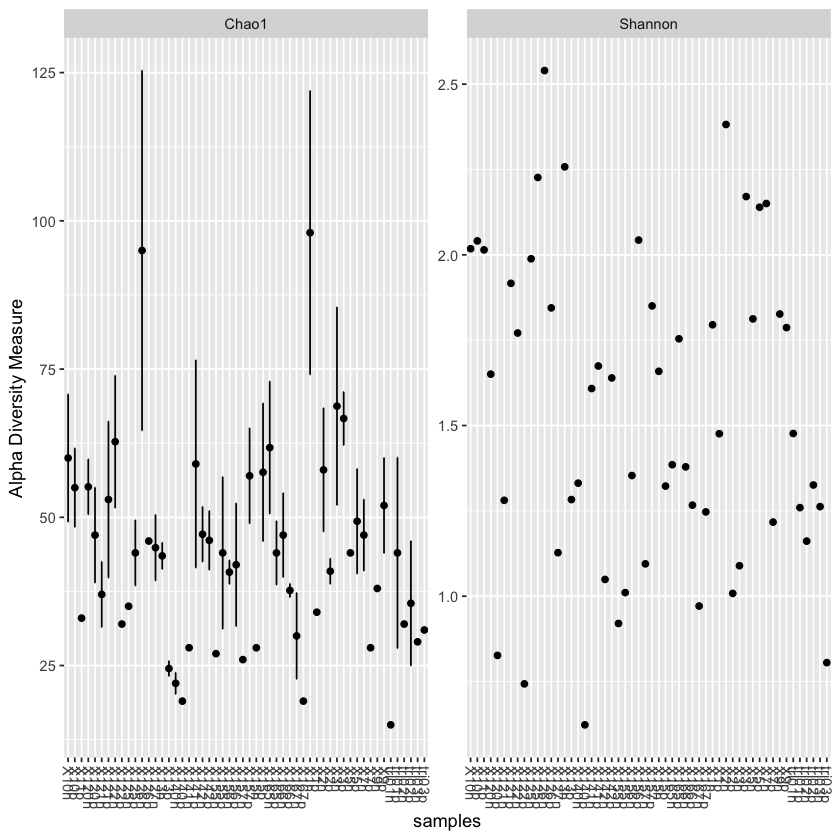

In [33]:
# Trazar estimador de riqueza Chao1 y estimador de diversidad de Shannon para todo carbom (otus)

plot_richness(carbom, measures=c("Chao1", "Shannon"))

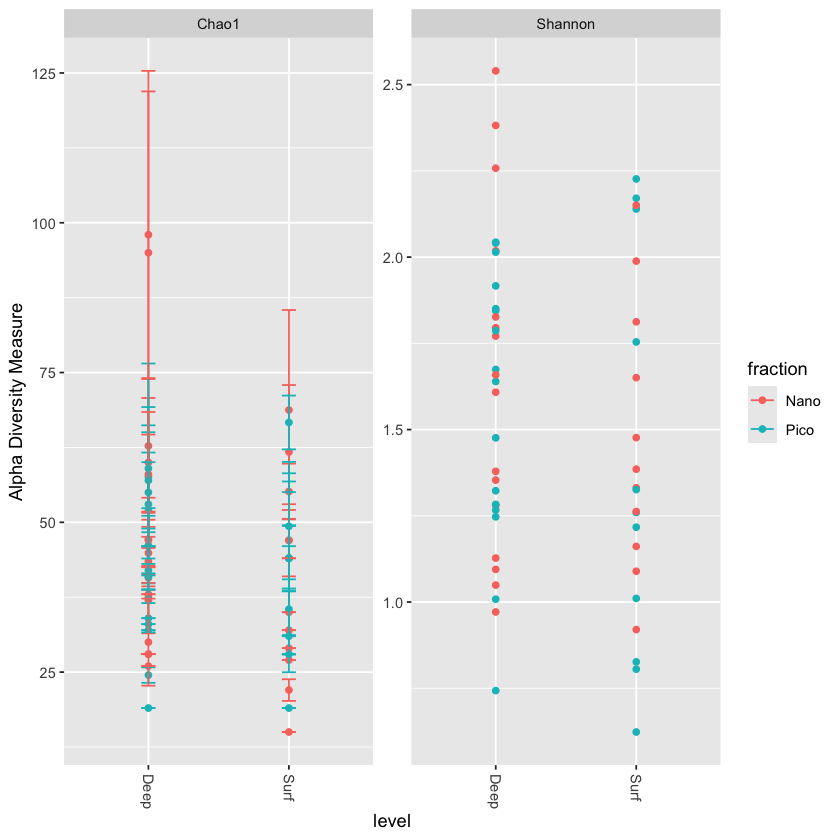

In [34]:
# Reagrupar muestras de la misma fracción.

plot_richness(carbom, measures=c("Chao1", "Shannon"), x="level", color="fraction")


# DIVERSIDAD ENTRE ESPECIES BETA

En este ejercicio nos interesa comparar la diversidad entre divsiones

Recordemos que varias divisiones  de organismos (ver tabla). 

Necesitamos crear una lista de comparasiones de a pares para poder visualizar y calcular significancia estadística de manera simultánea.

En cuanto a diversidad beta podemos calcular similitud global  a través de todas las muestras de interés o también podemos cuantificar la divergencia de un grupo y compararla con la divergencia de otro.


[conflicted] Will prefer ggpubr::mutate over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer ggpubr::mutate over any other package.


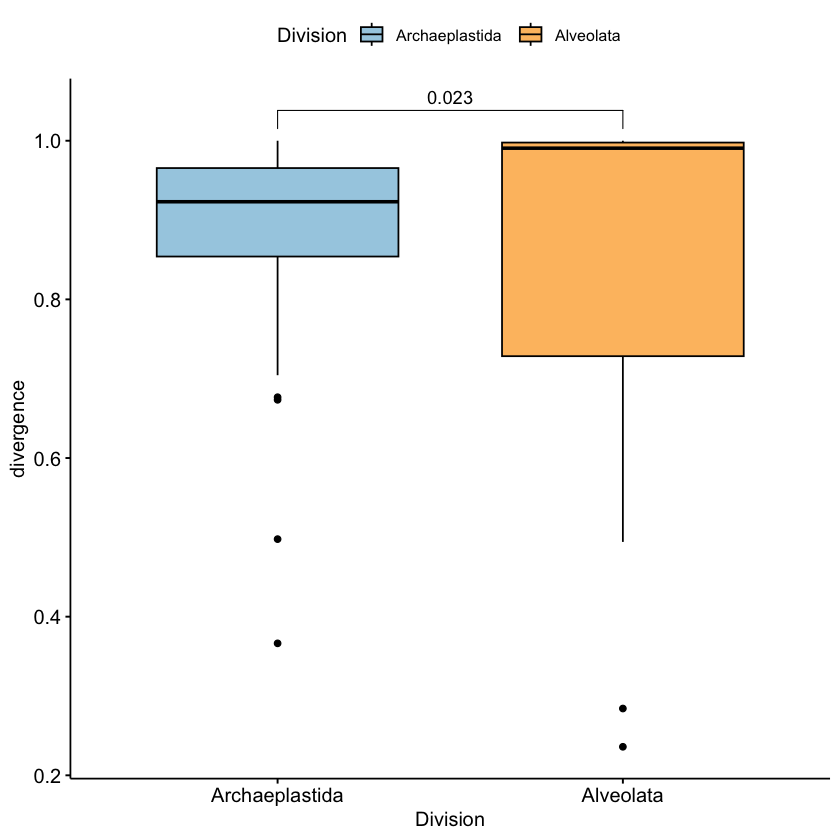

In [35]:
# Veamos este caso primero.

# Calculamos las divergencias para la division Chlorophyta (subgrupo: Archaeplastida) y Dinophyta (subgrupo: Alveolata)

div.Archaeplastida <- divergence(subset_taxa(carbom, Division == "Chlorophyta"), apply(abundances(subset_taxa(carbom, Division == "Chlorophyta")), 1, median))
div.Alveolata <- divergence(subset_taxa(carbom, Division == "Dinophyta"), apply(abundances(subset_taxa(carbom, Division == "Dinophyta")), 1, median))

# transformamos el resultado anterior en _dataframes_
data.frame(div.Archaeplastida) -> df.div.Archaeplastida
data.frame(div.Alveolata) -> df.div.Alveolata

# Gather

df.div.Archaeplastida <- gather(df.div.Archaeplastida, taxa, divergence)
df.div.Alveolata <- gather(df.div.Alveolata, taxa, divergence)

# Agregamos columnas a nuestros _dataframes_

conflicts_prefer(ggpubr::mutate) # solución a problemas de conflicto
conflicts_prefer(ggpubr::mutate) # solución a problemas de conflicto

mutate(df.div.Archaeplastida, Division = "Archaeplastida") -> df.div.Archaeplastida
mutate(df.div.Alveolata, Division = "Alveolata") -> df.div.Alveolata

# Cambiamos los nombres de las columans de manera que sean iguales an ambos _dataframes_

colnames(df.div.Archaeplastida) <- c("taxa", "divergence", "Division")
colnames(df.div.Alveolata) <- c("taxa", "divergence", "Division")

# Los combinamos en un _dataframe_

rbind(df.div.Archaeplastida, df.div.Alveolata) -> div.boxplot

# Y finalmente graficamos y realizamos una comparación estadística

p2 <- ggboxplot(data = div.boxplot, x = "Division", y = "divergence", fill = "Division", palette = c("#a6cee3", "#fdbf6f"))
p2 + stat_compare_means(comparisons = list(c("Archaeplastida", "Alveolata")))


Divergencia: La "divergencia" se refiere, en este contexto, a la variabilidad genética o diferencia en las secuencias de ADN/ARN de los organismos pertenecientes a las dos divisiones.

Comparación entre Divisiones:

Archaeplastida: Esta división tiene una mediana de divergencia más alta en comparación con Alveolata. También tiene varios valores atípicos en el rango inferior.
Alveolata: Esta división tiene una mediana de divergencia ligeramente más baja y también presenta valores atípicos, pero en el rango superior.
La cifra 0.023 entre las dos cajas sugiere que hay una diferencia estadísticamente significativa entre las medianas de las dos divisiones con un valor de p de 0.023. Esto significa que es probable que la diferencia observada entre las dos divisiones no se deba al azar.

Existen diferentes medidas de similitud (o disimilitud) disponibles que nos permiten entender las relaciones entre nuestras muestras. 

En general todas producen matrices de distancia comparables. 

El paquete phyloseq ofrece un gran número de medidas de distancia. 

Las más populares son UniFrac y Weighted UniFrac (medidas que consideran filogenia) y otras independientes de filogenia como: Jaccard, Manhattan, Euclidian, Bray-Curtis, Canberra, etc. 


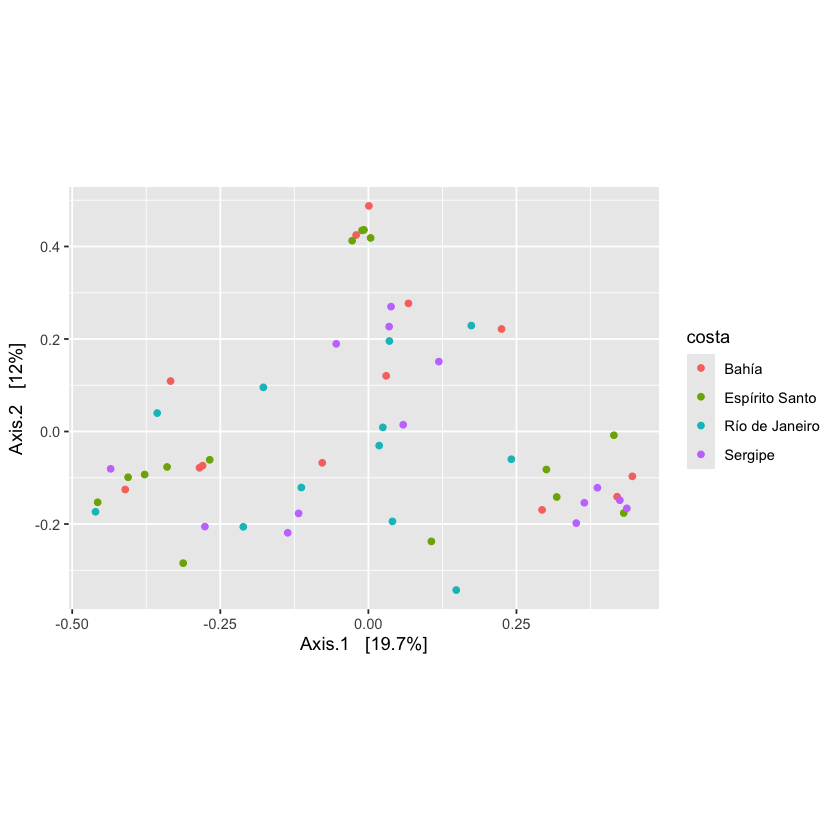

In [36]:
# ej independiente de filogenia.
# los datos de "costa" han sido inventados"

carbom.mds.bray <- ordinate(carbom, method = "MDS", distance = "bray")
evals <- carbom.mds.bray$values$Eigenvalues
pord1 <- plot_ordination(carbom, carbom.mds.bray, color = "costa") +
  labs(col = "costa") +
  coord_fixed(sqrt(evals[2] / evals[1]))
grid.arrange(pord1)


# ORDENACIÓN

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2317058 
Run 1 stress 0.248295 
Run 2 stress 0.2359487 
Run 3 stress 0.233678 
Run 4 stress 0.2334157 
Run 5 stress 0.2513722 
Run 6 stress 0.2359219 
Run 7 stress 0.2344758 
Run 8 stress 0.2365065 
Run 9 stress 0.2508924 
Run 10 stress 0.2528102 
Run 11 stress 0.2522687 
Run 12 stress 0.2586619 
Run 13 stress 0.2473351 
Run 14 stress 0.2552807 
Run 15 stress 0.2466239 
Run 16 stress 0.2558488 
Run 17 stress 0.231549 
... New best solution
... Procrustes: rmse 0.1074983  max resid 0.3774006 
Run 18 stress 0.2317058 
... Procrustes: rmse 0.1075122  max resid 0.3815932 
Run 19 stress 0.2425719 
Run 20 stress 0.2346305 
*** Best solution was not repeated -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    17: stress ratio > sratmax
     2: scale factor of the gradient < sfgrmin


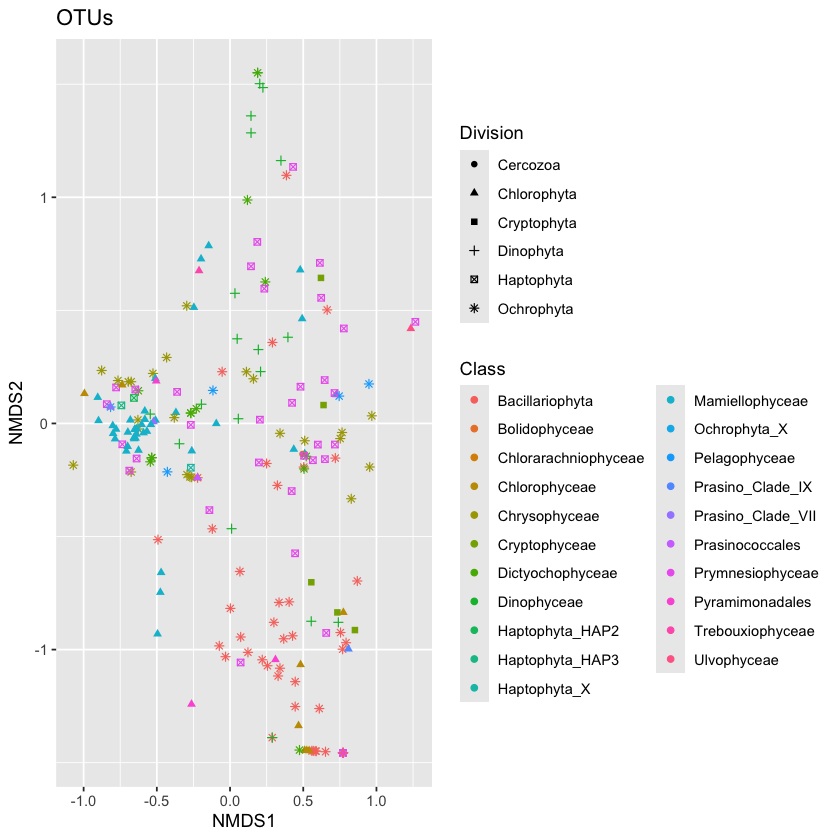

In [37]:

# análisis multivariable basado en la distancia de Bray-Curtis y la ordenación NMDS

carbom.ord <- ordinate(carbom, "NMDS", "bray")

# Trazamos OTU

plot_ordination(carbom, carbom.ord, type="taxa", color="Class", shape= "Division", 
                title="OTUs")


Un poco confuso, así que hacemos que sea más fácil de visualizar dividiéndolo según la división taxonómica.


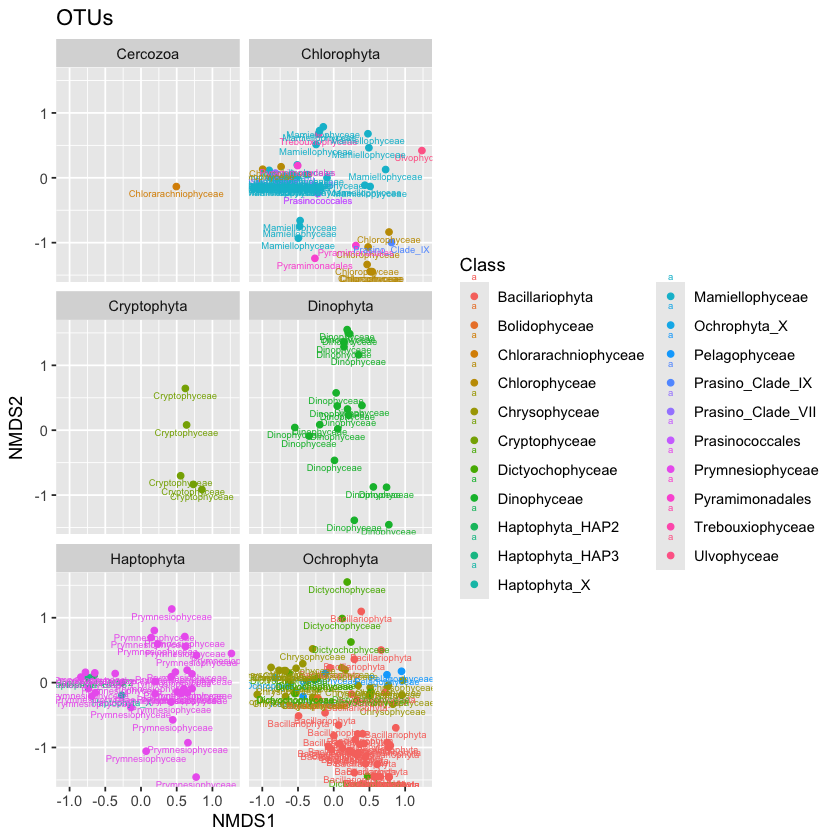

In [38]:
plot_ordination(carbom, carbom.ord, type="taxa", color="Class", 
                title="OTUs", label="Class") + 
  facet_wrap(~Division, 3)

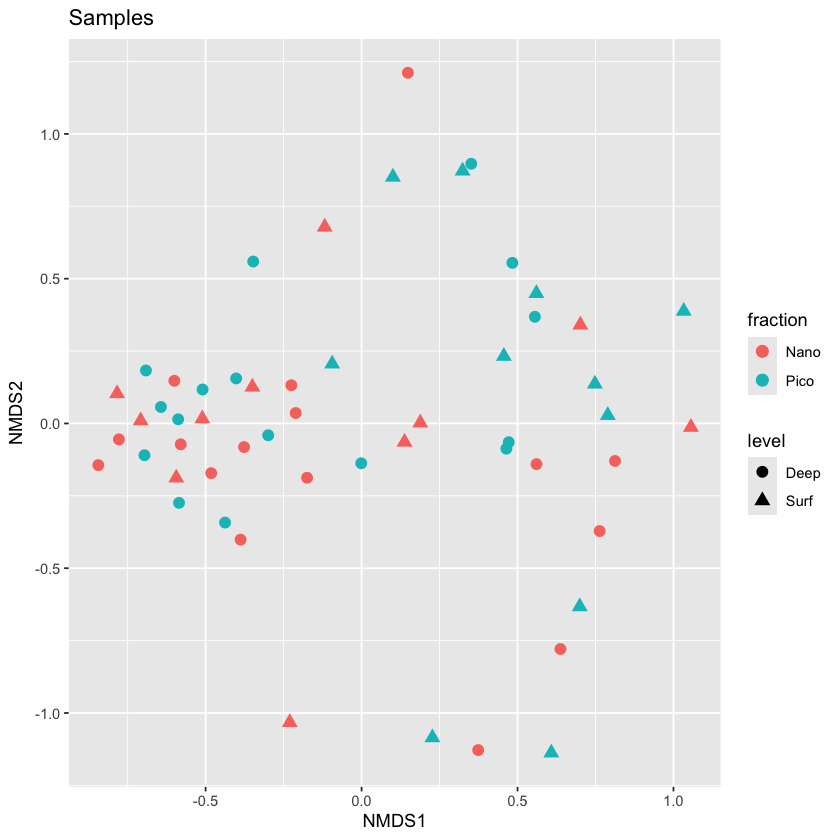

In [39]:
# Ahora mostramos ejemplos y amplíamos los puntos para que sea más fácil de leer.

plot_ordination(carbom, carbom.ord, type="samples", color="fraction", 
                shape="level", title="Samples") + geom_point(size=3)

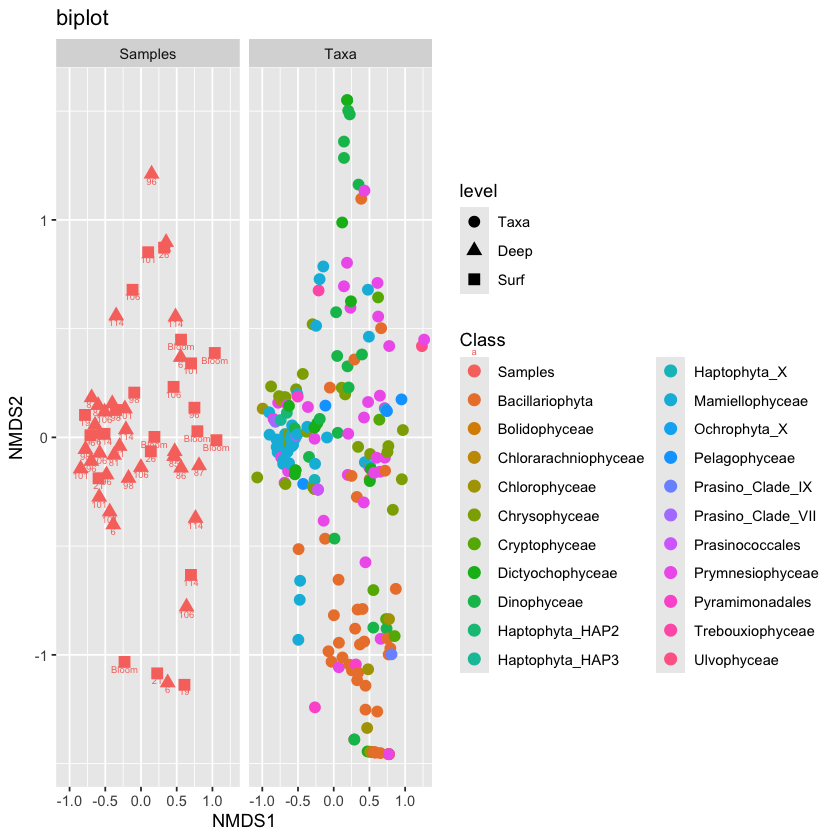

In [40]:
# ahora vemos  muestras y OTU pero en 2 paneles diferentes.

plot_ordination(carbom, carbom.ord, type="split", color="Class", 
                shape="level", title="biplot", label = "station") +  
  geom_point(size=3)

# ANALISIS DE REDES

Para finalizar, vamos a echar un vistazo a las capacidades de phyloseq para generar redes de co-occurrencia.

Las redes de co-ocurrencia nos dan pistas sobre potenciales interacciones ecológicas entre organismos.

Estas interacciones pueden ser directas o indirectas (no lo podemos determinar a partir de una red) y nos permiten comenzar a descifrar mecanismos ecológicos detrás de la composición de una comunidad microbiana. 

En general en ecología tenemos distintos tipos de interacciones:

mutalismo, comensalismo, predación, amensalismo, competición o mutua depredación


![Texto alternativo](https://www.castrolab.org/teaching/data_analysis/images/ecological_interactions.png)

Donde destacan depredación, competición o depredación mutua, y mutualismo. 

Cada una de estas relaciones podría ser detectada en una red de co-ocurrencia según patrones de correlación positivos o negativos.

Veamos como generaríamos una red en phyloseq


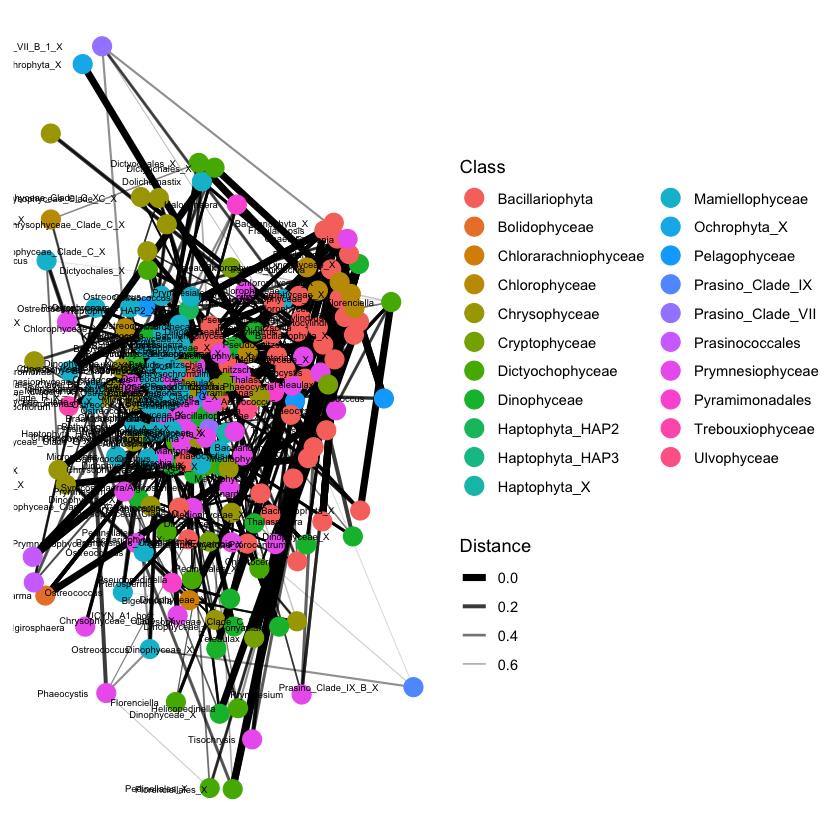

In [41]:
# Análisis de red simple

plot_net(carbom, distance = "(A+B-2*J)/(A+B)", type = "taxa", 
         maxdist = 0.8, color="Class", point_label="Genus")

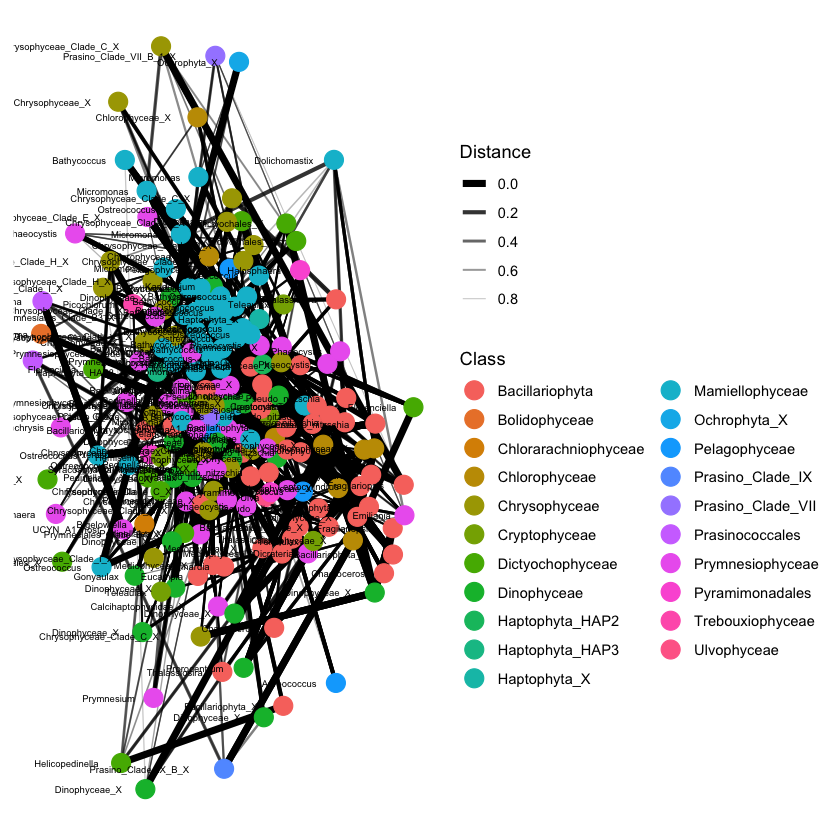

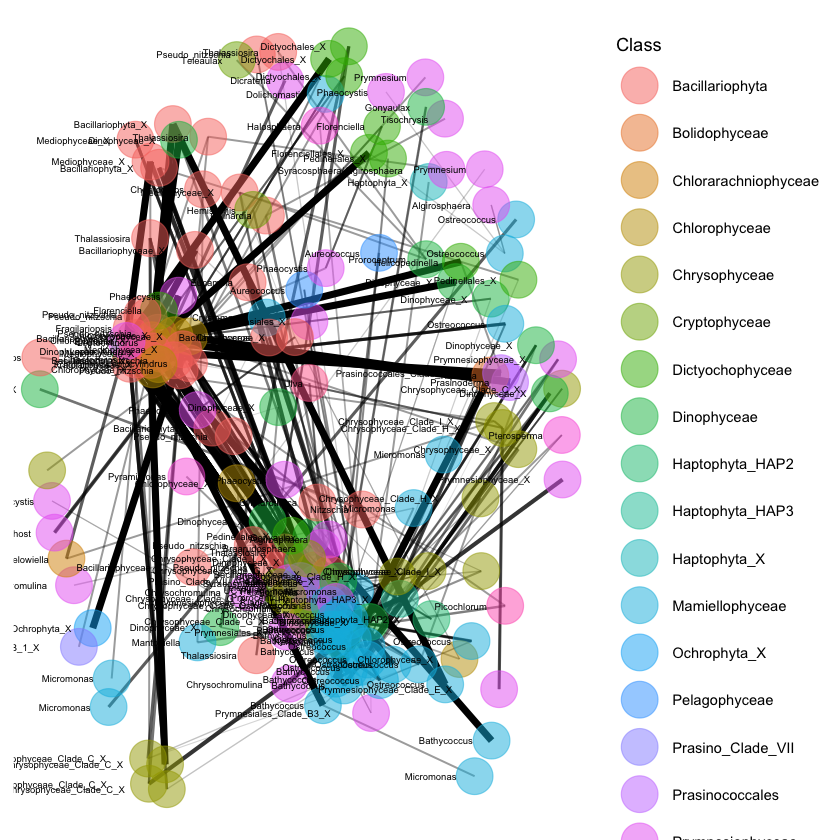

In [42]:
# Esto es bastante confuso. Hagámoslo más simple usando solo OTU principales

plot_net(carbom, distance = "(A+B-2*J)/(A+B)", type = "taxa", 
         maxdist = 0.9, color="Class", point_label="Genus")

plot_net(carbom, type = "taxa", point_label = "Genus", 
         point_size = 10, point_alpha = 0.5, maxdist = 0.5, distance = "(A+B-2*J)/(A+B)", color= "Class", laymeth = "auto") 


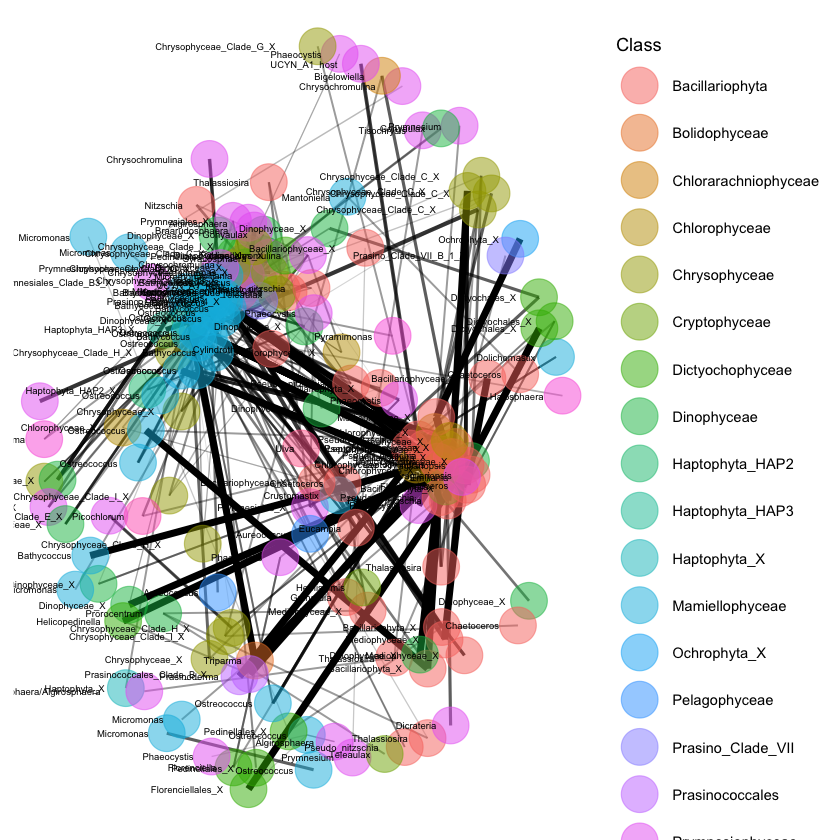

In [43]:
# parecido
plot_net(carbom, type = "taxa", point_label = "Genus", point_size = 10, point_alpha = 0.5, maxdist = 0.5, color = "Class", distance = "(A+B-2*J)/(A+B)", laymeth = "auto") 

# IMPORTANTE! 

La red generada con phyloseq no es una red de co-ocurrencia propiamente, es más bien una red que representa relaciones de distancia entre taxa o muestras. En nuestro ejemplo usamos muestras. Para una red de co-ocurrencia propiamente tal necesitamos usar las funciones del paquete: SpiecEasi

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done

Warning message:
"`graph.adjacency()` was deprecated in igraph 2.0.0.
i Please use `graph_from_adjacency_matrix()` instead."


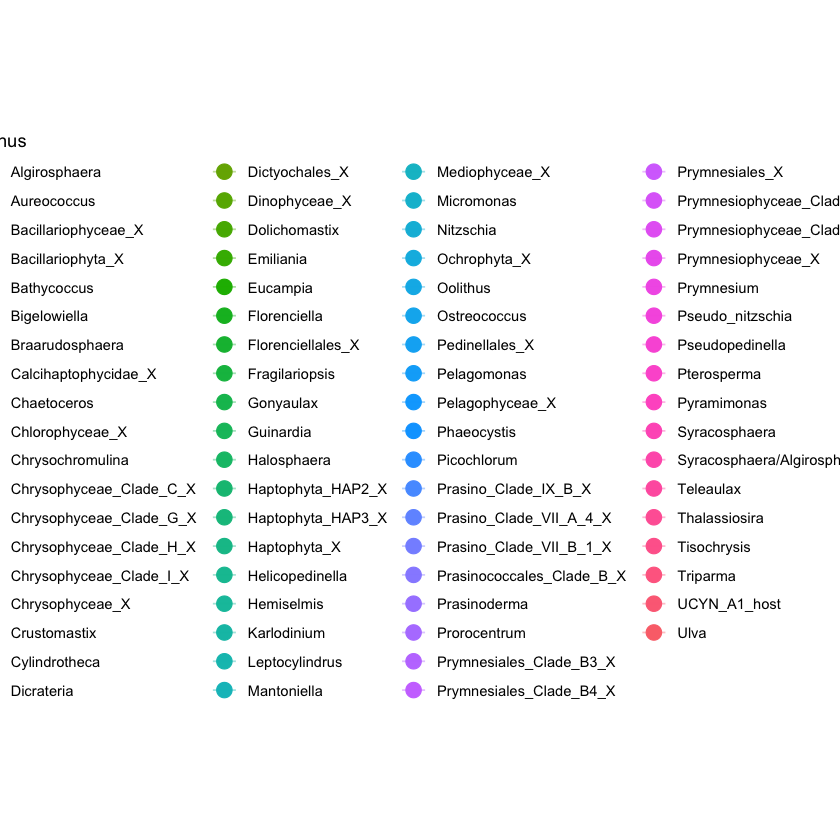

In [44]:
library(SpiecEasi)

se.mb.psd4 <- spiec.easi(carbom, method = 'mb', lambda.min.ratio=1e-2,
                         nlambda=20, icov.select.params = list(rep.num=50))

# Obtener la matriz de adyacencia y convertirla a una matriz densa
adj_matrix <- getRefit(se.mb.psd4)
dense_adj_matrix <- as.matrix(adj_matrix)

# Crear el grafo usando la matriz densa
ig2.mb <- igraph::graph.adjacency(dense_adj_matrix, mode="undirected", weighted=TRUE, diag=FALSE)
V(ig2.mb)$name <- taxa_names(carbom)

plot_network(ig2.mb, carbom, type = "taxa", color = "Genus")


Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



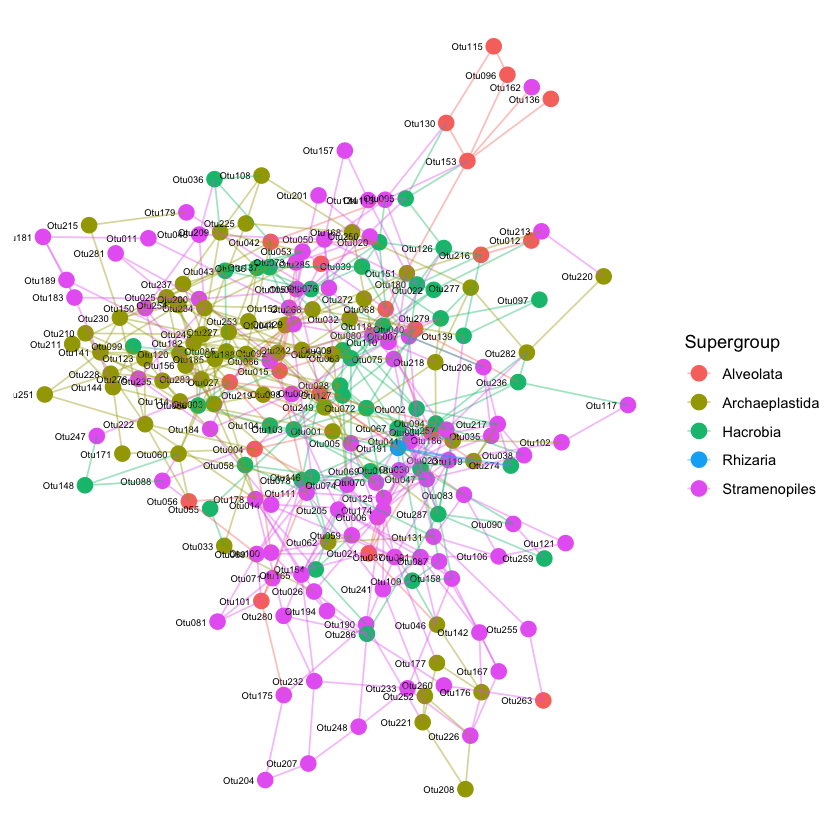

In [45]:
se.glasso <- spiec.easi(carbom, method = 'mb', lambda.min.ratio=1e-2,
                         nlambda=20, icov.select.params = list(rep.num=50))
# Obtener la matriz de adyacencia y convertirla a una matriz densa
adj_matrix <- getRefit(se.mb.psd4)
dense_adj_matrix <- as.matrix(adj_matrix)

# Crear el grafo usando la matriz densa
ig2.mb <- igraph::graph.adjacency(dense_adj_matrix, mode="undirected", weighted=TRUE, diag=FALSE)
V(ig2.mb)$name <- taxa_names(carbom)

plot_network(ig2.mb, carbom, type = "taxa", color = "Supergroup")


Si se ven pocas conexiones en el gráfico, podría deberse a varias razones:

Interacciones Fuertes: spiec.easi busca interacciones fuertes y significativas en los datos. Si hay pocas conexiones, podría ser una indicación de que solo se han identificado pocas interacciones fuertes y confiables en tu conjunto de datos.

Parámetros del Modelo: La elección de parámetros para spiec.easi puede influir en el número de aristas identificadas. Por ejemplo, lambda.min.ratio y nlambda pueden ajustarse para identificar más o menos interacciones. Puede intentar ajustar estos parámetros para ver si obtiene más conexiones.

Una red de co-ocurrencia en análisis metagenómicos (por ejemplo, inferida con la herramienta SpiecEasi) sirve para visualizar posibles interacciones o patrones de asociación entre distintos organismos (en este caso, OTUs u otras unidades taxonómicas) a partir de sus abundancias en múltiples muestras. 

En la figura:

**Nodos:**

Cada círculo representa un OTU (unidad taxonómica operacional).
El color de cada nodo indica el “supergrupo” al que pertenece (por ejemplo, Alveolata en rojo, Archaeplastida en verde, etc.).

**Conexiones (aristas):**

Las líneas entre nodos señalan correlaciones o asociaciones estadísticamente significativas entre los OTUs.
Cuando dos nodos aparecen unidos, quiere decir que tienden a “co-ocurrir” en las mismas muestras o que sus abundancias están correlacionadas (una posible señal de que comparten nicho, tienen alguna relación ecológica o responden a factores ambientales similares).
Patrones y agrupaciones:

Si observas grupos de nodos muy interconectados, podrías estar ante “subredes” de organismos que suelen presentarse juntos de manera consistente.
La cercanía o lejanía en la red también puede indicar cuán estrechamente correlacionados están los OTUs.

**Interpretación ecológica:**

Una co-ocurrencia fuerte podría reflejar relaciones sinérgicas (por ejemplo, mutualismo, dependencia de recursos similares, etc.) o incluso competencia, dependiendo de la dirección de la correlación y el contexto ecológico.
Que distintos supergrupos aparezcan interconectados sugiere que en el ambiente analizado estos organismos podrían compartir condiciones ecológicas o interactuar de forma directa o indirecta (por ejemplo, formando parte de cadenas tróficas o consorcios microbianos).
Importancia de SpiecEasi:

**SpiecEasi** (Sparse InversE Covariance estimation for Ecological Association Inference) trata de corregir problemas propios de los datos metagenómicos, como la composicionalidad y la alta dimensionalidad, para inferir redes de co-ocurrencia más fiables.
Esto significa que las asociaciones mostradas en la figura tienen mayor probabilidad de reflejar relaciones biológicamente relevantes y no solo artefactos estadísticos.

***Diferencias principales entre una red de co-ocurrencia (como la inferida con SpiecEasi) y una red basada en distancias entre taxa o entre muestras:**

Tipo de información representada

**Red de co-ocurrencia (SpiecEasi u otras):**

Muestra asociaciones (correlaciones o correlaciones parciales) entre las abundancias de distintos taxa.
Un enlace (arista) fuerte entre dos nodos indica que sus abundancias fluctúan de forma relacionada (positiva o negativa), sugiriendo una potencial interacción ecológica o respuesta común a factores ambientales.

**Red basada en distancias:**

Muestra la similitud o diferencia entre taxa (o muestras) según una métrica de distancia (p. ej., distancia filogenética, Bray-Curtis, Euclidiana, etc.).
Un enlace corto implica que dos nodos son más “similares” (o cercanos) según esa métrica; un enlace largo implica que son más diferentes.
Enfoque de construcción de la red

**Co-ocurrencia:**

Se parte de la abundancia relativa (u otro tipo de conteo) de cada OTU/taxon en múltiples muestras.
Se calcula una matriz de correlaciones (o de correlaciones parciales) para ver qué pares de taxa se asocian estadísticamente.
Se suele aplicar un umbral para definir qué asociaciones son estadísticamente significativas y se construye la red con esas conexiones.

**Distancia:**

Se parte de un conjunto de distancias entre cada par de nodos (taxa o muestras).
La red puede representarse uniendo nodos que estén por debajo de un cierto umbral de distancia o conectándolos con aristas ponderadas según su distancia.
También se pueden derivar árboles filogenéticos o dendrogramas a partir de esas distancias, que no siempre se representan como una “red” típica, sino como un árbol.

**Objetivo e interpretación**

**Co-ocurrencia (interacciones potenciales):**

Útil para inferir posibles relaciones ecológicas (mutualismo, competencia, nichos compartidos).
Ayuda a entender qué grupos de organismos podrían estar co-existiendo o co-dependiendo.

**Distancias (similitud/diferencia):**

Útil para clasificar, agrupar o comparar la diversidad de muestras o la divergencia entre taxa.

Permite ver si ciertos grupos de muestras o taxa se parecen más entre sí que a otros, ya sea a nivel genómico, filogenético, funcional, etc.
Uso de los datos

SpiecEasi (u otras herramientas de co-ocurrencia) corrigen la composicionalidad de los datos metagenómicos y la alta dimensionalidad para estimar correlaciones parciales (inversas de covarianza).

Redes de distancia suelen usar métricas como Bray-Curtis o distancias filogenéticas; en esos casos, no se está modelando la correlación directa entre dos taxones, sino cuánto difieren en términos de abundancias globales, secuencias, o rasgos filogenéticos.

**En resumen:**

Una red de co-ocurrencia se centra en la relación estadística de presencia/abundancia entre pares de taxa (¿quién se asocia con quién?), mientras que
Una red de distancias se enfoca en la similitud o diferencia general entre taxa o muestras (¿quién se parece más a quién y cuán diferente es?).
Ambas aproximaciones son complementarias y pueden utilizarse juntas para obtener una visión más completa de la estructura y las interacciones en una comunidad metagenómica.